<a href="https://colab.research.google.com/github/juanninocruz/Estadistica/blob/main/Act03_V14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://d1yjjnpx0p53s8.cloudfront.net/styles/logo-thumbnail/s3/102012/logo_unab.png?itok=hZ5x30O2" width="240" height="240" align="right"/>

<center><h1>Estudio de caso 3 - Estadística para la Ciencia de Datos</header1></center>

**Selección y evaluación de modelo de regresión o clasificación**



Presentado por: <br>
Niño Cruz Juan Carlos <br>
Santander Fernandez Jorge Enrique <br>
Pimienta Chaparro Giulianno Farid <br>
Riatiga Peña Juan Carlos <br><br>
Fecha: 02/06/2025

## **Contenido**

1. Introducción
2. Importación de librerias
3. Cargue del Dataset

    3.1 Observaciones del cargue de datos

4. Explicación del problema a resolver

    4.1 Descripción del problema

    4.2 Variables de entrada

5. Caracterización del Dataset

    5.1 Número de clases de la variable objetivo (dlq_2yrs)

    5.2 Número de instancias.

    5.3 Número de instancias pertenecientes a la variable objetivo
    
    5.4 Número de atributos de entrada, su significado y tipo

    5.6 Valores desconocidos en el dataset

    5.7 Observaciones de la caracterización del Dataset   

6. Validación de los datos

    6.1 Pruebas

    6.2 Observaciones de la validación de datos

7. Exploración de datos univariado

    7.1 Análisis de varia0

    7.2 Análisis de variables categóricas

    7.3 Observaciones de la  exploración de datos univariado

8. Exploración de datos multivariado

    8.1 Valores (mínimo, máximo, media y mediana) de atributos (numéricos)
    
    8.2 Matriz de correlación

    8.3 Gráfica PairPlot

    8.4 Análisis de Distribución de Densidad Bivariado de Atributos

    8.5 Observaciones de la  exploración de datos multivariado

9. Planteamiento del problema

    9.1 Definición del problema
       
    9.1 Justificación del modelo

10. Preprocesamiento y selección de atributos del modelo

	10.1 Observaciones del preprocesamiento y selección de atributos

11. F1-score

    11.1 Observaciones F1-Score del modelo de Regresión Logística

    11.2 hiperparametros al azar para entrenar el modelo

    11.3 F1-Score de hiperparámetros generadas aleatoriamente

    11.4 Observaciones F1-Score de hiperparámetros generadas aleatoriamente

12. Conclusiones

13. Referencias bibliográficas

14. Videos

## **1. Introducción**

Conjunto de datos de referencia de riesgo crediticio

---

El riesgo crediticio es un tema muy interesante y complejo, ya que no solo implica gestionar posibles pérdidas financieras, sino que también ofrece una gran oportunidad para extraer información valiosa a partir de los datos. Los matices en el comportamiento de los atributos numéricos, como ingresos, historial de pagos, deudas, entre otros, pueden ser clave para desarrollar modelos predictivos eficaces.

Al analizar estos atributos con técnicas de ciencia de datos, se puede identificar patrones y tendencias que ayudan a evaluar la probabilidad de incumplimiento de un cliente o a segmentar a los solicitantes en diferentes perfiles de riesgo. Esto permite tomar decisiones más informadas, personalizar ofertas y mejorar la gestión del portafolio crediticio.

En este estudio se realiza un análisis exploratorio, estadístico e interpretativo del conjunto de datos proporcionado: Credit Risk Benchmark Dataset. El objetivo principal es comprender las características principales del dataset, identificar patrones relevantes y responder preguntas claves de la evaluación de modelo de regresión o clasificación.

## **2. Importación de librerias**

In [2]:
#Para esta actividad se importarán las siguientes librerías:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde
from matplotlib.colors import LinearSegmentedColormap

In [3]:
#Módulo de Python:warnings, para ignorar advertencias
import warnings
warnings.filterwarnings('ignore')

## **3. Cargar el Dataset**

In [4]:
#Código para cargar el Dataset
path = 'https://raw.githubusercontent.com/jriatiga/dataset/refs/heads/main/Credit_Risk_Benchmark_Dataset.csv'


In [5]:
data = pd.read_csv(path, decimal=",")

In [6]:
# Mostrar las primeras 30 filas del dataset
data.head(30)

rev_util   age late_30_59   debt_ratio monthly_inc open_credit late_90  \
0     0.0069995  38.0        0.0   0.30215034      5440.0         4.0     0.0   
1   0.704591673  63.0        0.0   0.47144107      8000.0         9.0     0.0   
2    0.06311272  57.0        0.0  0.068586283      5000.0        17.0     0.0   
3   0.368396761  68.0        0.0  0.296272596      6250.0        16.0     0.0   
4     0.9999999  34.0        1.0          0.0      3500.0         0.0     0.0   
5   0.051799309  63.0        0.0  0.770687088      4700.0        16.0     0.0   
6    0.64873296  40.0        1.0  0.402060294      6600.0        10.0     0.0   
7   0.767270301  33.0        0.0  0.338389933      5800.0        10.0     0.0   
8   0.190110944  27.0        0.0  0.164604898      3960.0         6.0     0.0   
9   0.139988526  65.0        1.0  0.258397125      6400.0         6.0     0.0   
10          0.0  52.0        1.0  0.286716671      8265.0         8.0     0.0   
11  0.569571738  37.0        0.0   0.27366216      5250.0         4.0     0.0   
12  0.086599033  51.0        0.0  0.359143922      8316.0        14.0     0.0   
13  0.818706415  56.0        0.0   0.47000279     10750.0        12.0     0.0   
14  0.135232153  51.0        0.0  0.467505241      6200.0        12.0     0.0   
15  0.015890302  59.0        0.0  0.253457757      6000.0        11.0     0.0   
16  0.111652246  37.0        1.0  0.297612438      1800.0         6.0     0.0   
17  0.000535196  39.0        0.0  0.054067298      6121.0        11.0     0.0   
18  0.223795661  70.0        1.0  0.497350265     10000.0        18.0     0.0   
19  0.039100799  48.0        0.0  0.266341707      8000.0         8.0     0.0   
20  0.080654744  67.0        0.0   0.52790626      3242.0        22.0     0.0   
21  0.032183202  40.0        1.0  0.086390127      8750.0         7.0     0.0   
22  0.063893611  30.0        0.0  0.329896907      2133.0         5.0     0.0   
23    0.9999999  47.0        0.0  0.262403031     11085.0         5.0     0.0   
24  0.064239635  38.0        0.0   0.33639399      9583.0        14.0     0.0   
25  0.451936578  31.0        0.0   1.02736266      4750.0         6.0     1.0   
26  0.750031328  38.0        0.0  0.392925228      4720.0         6.0     0.0   
27  0.368342403  70.0        0.0  0.189680635     10833.0        18.0     0.0   
28  0.259730764  61.0        1.0  0.501488498      3694.0        11.0     0.0   
29  0.038249276  50.0        1.0  0.367148441     11000.0         9.0     0.0   

   real_estate late_60_89 dependents  dlq_2yrs  
0          1.0        0.0        3.0         0  
1          1.0        0.0        0.0         0  
2          0.0        0.0        0.0         0  
3          2.0        0.0        0.0         0  
4          0.0        0.0        1.0         0  
5          1.0        0.0        1.0         0  
6          2.0        0.0        3.0         0  
7          0.0        0.0        3.0         0  
8          0.0        0.0        1.0         0  
9          1.0        0.0        0.0         0  
10         1.0        0.0        2.0         0  
11         1.0        0.0        2.0         0  
12         1.0        0.0        4.0         0  
13         2.0        0.0        1.0         0  
14         1.0        0.0        0.0         0  
15         1.0        0.0        2.0         0  
16         0.0        0.0        2.0         0  
17         0.0        0.0        3.0         0  
18         2.0        0.0        0.0         0  
19         2.0        0.0        0.0         0  
20         1.0        0.0        0.0         0  
21         0.0        0.0        2.0         0  
22         0.0        0.0        0.0         0  
23         2.0        0.0        3.0         0  
24         2.0        0.0        3.0         0  
25         2.0        0.0        0.0         0  
26         1.0        0.0        2.0         0  
27         0.0        0.0        0.0         0  
28         3.0        0.0        0.0         0  
29         2.0        0.0

In [7]:
# Mostrar las ultimas 30 filas del dataset
data.head(30)

rev_util   age late_30_59   debt_ratio monthly_inc open_credit late_90  \
0     0.0069995  38.0        0.0   0.30215034      5440.0         4.0     0.0   
1   0.704591673  63.0        0.0   0.47144107      8000.0         9.0     0.0   
2    0.06311272  57.0        0.0  0.068586283      5000.0        17.0     0.0   
3   0.368396761  68.0        0.0  0.296272596      6250.0        16.0     0.0   
4     0.9999999  34.0        1.0          0.0      3500.0         0.0     0.0   
5   0.051799309  63.0        0.0  0.770687088      4700.0        16.0     0.0   
6    0.64873296  40.0        1.0  0.402060294      6600.0        10.0     0.0   
7   0.767270301  33.0        0.0  0.338389933      5800.0        10.0     0.0   
8   0.190110944  27.0        0.0  0.164604898      3960.0         6.0     0.0   
9   0.139988526  65.0        1.0  0.258397125      6400.0         6.0     0.0   
10          0.0  52.0        1.0  0.286716671      8265.0         8.0     0.0   
11  0.569571738  37.0        0.0   0.27366216      5250.0         4.0     0.0   
12  0.086599033  51.0        0.0  0.359143922      8316.0        14.0     0.0   
13  0.818706415  56.0        0.0   0.47000279     10750.0        12.0     0.0   
14  0.135232153  51.0        0.0  0.467505241      6200.0        12.0     0.0   
15  0.015890302  59.0        0.0  0.253457757      6000.0        11.0     0.0   
16  0.111652246  37.0        1.0  0.297612438      1800.0         6.0     0.0   
17  0.000535196  39.0        0.0  0.054067298      6121.0        11.0     0.0   
18  0.223795661  70.0        1.0  0.497350265     10000.0        18.0     0.0   
19  0.039100799  48.0        0.0  0.266341707      8000.0         8.0     0.0   
20  0.080654744  67.0        0.0   0.52790626      3242.0        22.0     0.0   
21  0.032183202  40.0        1.0  0.086390127      8750.0         7.0     0.0   
22  0.063893611  30.0        0.0  0.329896907      2133.0         5.0     0.0   
23    0.9999999  47.0        0.0  0.262403031     11085.0         5.0     0.0   
24  0.064239635  38.0        0.0   0.33639399      9583.0        14.0     0.0   
25  0.451936578  31.0        0.0   1.02736266      4750.0         6.0     1.0   
26  0.750031328  38.0        0.0  0.392925228      4720.0         6.0     0.0   
27  0.368342403  70.0        0.0  0.189680635     10833.0        18.0     0.0   
28  0.259730764  61.0        1.0  0.501488498      3694.0        11.0     0.0   
29  0.038249276  50.0        1.0  0.367148441     11000.0         9.0     0.0   

   real_estate late_60_89 dependents  dlq_2yrs  
0          1.0        0.0        3.0         0  
1          1.0        0.0        0.0         0  
2          0.0        0.0        0.0         0  
3          2.0        0.0        0.0         0  
4          0.0        0.0        1.0         0  
5          1.0        0.0        1.0         0  
6          2.0        0.0        3.0         0  
7          0.0        0.0        3.0         0  
8          0.0        0.0        1.0         0  
9          1.0        0.0        0.0         0  
10         1.0        0.0        2.0         0  
11         1.0        0.0        2.0         0  
12         1.0        0.0        4.0         0  
13         2.0        0.0        1.0         0  
14         1.0        0.0        0.0         0  
15         1.0        0.0        2.0         0  
16         0.0        0.0        2.0         0  
17         0.0        0.0        3.0         0  
18         2.0        0.0        0.0         0  
19         2.0        0.0        0.0         0  
20         1.0        0.0        0.0         0  
21         0.0        0.0        2.0         0  
22         0.0        0.0        0.0         0  
23         2.0        0.0        3.0         0  
24         2.0        0.0        3.0         0  
25         2.0        0.0        0.0         0  
26         1.0        0.0        2.0         0  
27         0.0        0.0        0.0         0  
28         3.0        0.0        0.0         0  
29         2.0        0.0

**3.1 Observaciones del cargue de datos**


---


Se visualizan las primeras y últimas filas del conjunto de datos para obtener una visión general de los datos y su estructura.

* El dataset no tiene datos faltantes.
* Los datos son mixtos, enteros y flotantes.

## **4. Explicación del problema a resolver**

**4.1 Descripción del problema**

---

El riesgo crediticio representa un desafío importante para las instituciones financieras, ya que implica la posibilidad de que un cliente no cumpla con sus obligaciones de pago, lo que puede generar pérdidas económicas. Sin embargo, también ofrece una oportunidad valiosa: mediante el análisis de los atributos numéricos relacionados con los solicitantes, como ingresos, historial de pagos, nivel de endeudamiento, entre otros, se pueden construir modelos que predigan con mayor precisión la probabilidad de incumplimiento.

El problema a resolver consiste en desarrollar un modelo que, a partir de estos datos, pueda evaluar de manera eficaz el riesgo asociado a cada solicitante de crédito. Esto permitirá tomar decisiones más informadas, reducir la incertidumbre y optimizar la asignación de créditos, minimizando pérdidas y aprovechando las oportunidades de negocio.

**4.2 Variables de entrada**

---

Las variables disponibles en el conjunto de datos son las siguientes:

* rev_util: Relación de utilización del crédito rotativo (saldo/límite de crédito)
* edad: Edad del prestatario
* late_30_59: Número de veces que se ha vencido entre 30 y 59 días (peor que el actual)
* ratio_deuda: Ratio deuda-ingresos (o activos)
* monthly_inc: Ingresos mensuales del prestatario
* open_credit: Número de líneas de crédito y préstamos abiertos
* late_90: Número de veces que se ha retrasado 90 días o más un pago
* real_estate: Número de préstamos inmobiliarios o líneas de crédito
* late_60_89: Número de veces que se ha vencido entre 60 y 89 días (peor que el actual)
* dependientes: Número de dependientes
* dlq_2yrs: Variable objetivo que indica si ocurrió una delincuencia grave en los próximos 2 años (0 = No, 1 = Sí)

## **5. Caracterización del Dataset**

Se incluye una descripción de los datos. Se incorporá una descripción (EDA) del conjunto de datos utilizado. Se analiza el dataset proporcionando, se muestra al menos algunas de sus características mediante tablas y al menos algunas de ellas en modo gráfico (p.ej., histogramas, diagramas de dispersión, diagramas de cajas y bigotes, etc.)

**5.1 Número de clases de la variable objetivo (dlq_2yrs)**

---

La variable objetivo dlq_2yrs  indica si ocurrió una delito grave en los próximos 2 años (0 = No, 1 = Sí)

In [8]:
# Numero de clases de la variable dlq_2yrs

print("Número de clases de la variable 'dlq_2yrs':", data['dlq_2yrs'].nunique())

Número de clases de la variable 'dlq_2yrs': 2


**5.2 Número de instancias**

---

In [9]:
# Número de instancias (filas) en total
num_instancias = data.shape[0]
print(f"Número total de instancias: {num_instancias}")

Número total de instancias: 16714


**5.3 Número de instancias pertenecientes a la variable objetivo**

---


In [10]:
#Número de instancias pertenecientes a la clase dlq_2yrs analisis
print("Número de instancias por clase de la variable 'dlq_2yrs':")
print(data['dlq_2yrs'].value_counts())

Número de instancias por clase de la variable 'dlq_2yrs':
dlq_2yrs
0    8357
1    8357
Name: count, dtype: int64


**5.4 Número de atributos de entrada, su significado y tipo**

---

In [11]:
# Número de atributos de entrada en el dataset, significado y tipo
num_atributos = data.shape[1]
print(f"Número total de atributos: {num_atributos}")

Número total de atributos: 11


In [12]:
# Mostrar los nombres de las columnas
print("Nombres de los atributos:")
print(data.columns)

Nombres de los atributos:
Index(['rev_util', 'age', 'late_30_59', 'debt_ratio', 'monthly_inc',
       'open_credit', 'late_90', 'real_estate', 'late_60_89', 'dependents',
       'dlq_2yrs'],
      dtype='object')


In [13]:
# Función para inferir la naturaleza de cada variable
def tipo_de_variable(col):
    if col.nunique() == 2 and set(col.unique()) <= {0, 1}:
        return 'Binaria (0/1)'
    elif pd.api.types.is_numeric_dtype(col):
        return 'Numérica'
    elif pd.api.types.is_categorical_dtype(col) or col.dtype == 'object':
        return 'Categórica'
    else:
        return 'Otro'

# Crear un DataFrame con información de cada variable
info_vars = []
for col in data.columns:
    info_vars.append({
        'Variable': col,
        'Tipo de Dato': str(data[col].dtype),
        'Naturaleza': tipo_de_variable(data[col]),
        'Valores Únicos': data[col].nunique()
    })

df_info = pd.DataFrame(info_vars)
print(df_info.to_string(index=False))

   Variable Tipo de Dato    Naturaleza  Valores Únicos
   rev_util       object    Categórica           13887
        age       object    Categórica              78
 late_30_59       object    Categórica              16
 debt_ratio       object    Categórica           16128
monthly_inc       object    Categórica            5150
open_credit       object    Categórica              48
    late_90       object    Categórica              18
real_estate       object    Categórica              20
 late_60_89       object    Categórica              12
 dependents       object    Categórica               9
   dlq_2yrs        int64 Binaria (0/1)               2


**5.5 Atributos desconocidos**

---

In [14]:
# ¿Hay algún valor de atributo desconocido/nulo?
print("\nTotal de valores nulos en el dataset:")
print(data.isnull().sum())


Total de valores nulos en el dataset:
rev_util       0
age            0
late_30_59     0
debt_ratio     0
monthly_inc    0
open_credit    0
late_90        0
real_estate    0
late_60_89     0
dependents     0
dlq_2yrs       0
dtype: int64


**5.6 Valores desconocidos en el dataset**

---



Columnas con valores nulos y su cantidad:
Series([], dtype: int64)


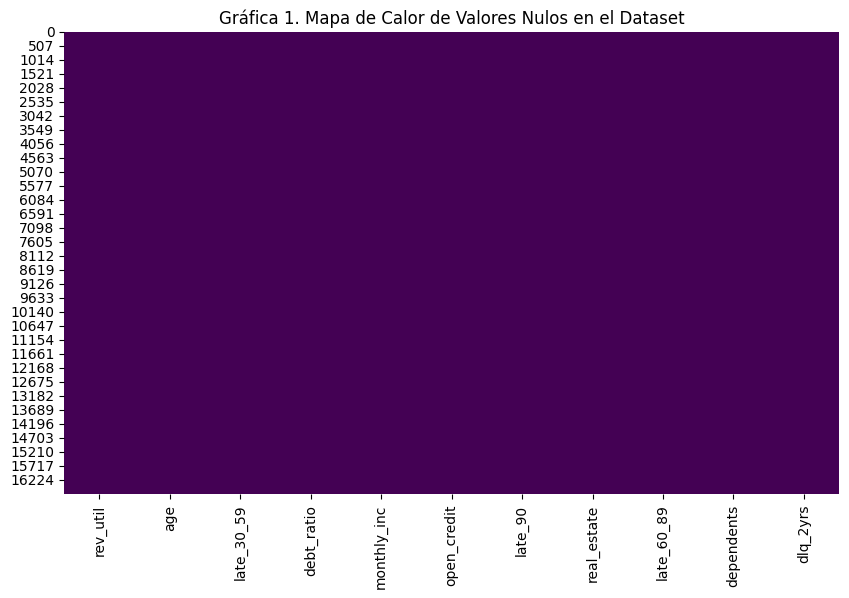

In [15]:
# prompt: valores desconocidos

import matplotlib.pyplot as plt
# Verificar si hay valores 'Unknown' en alguna columna (asumiendo que 'Unknown' es una cadena literal)
# En este dataset no parece haber la cadena literal 'Unknown', pero si valores nulos (NaN).
# Si hubiera valores 'Unknown' como cadena, usaríamos el siguiente código:
# unknown_counts = data[data.isin(['Unknown'])].count()
# print("\nNúmero de valores 'Unknown' por atributo:")
# print(unknown_counts[unknown_counts > 0])

# Para este dataset, vamos a centrarnos en los valores nulos (NaN), que ya se mostraron anteriormente.
# Si quisiéramos visualizarlo de otra forma:
print("\nColumnas con valores nulos y su cantidad:")
print(data.isnull().sum()[data.isnull().sum() > 0])

# Visualización gráfica de los valores nulos (opcional)
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Gráfica 1. Mapa de Calor de Valores Nulos en el Dataset')
plt.show()

**5.7 Observaciones de la caracterización del Dataset**

---

5.7.1   Clases de la variable objetivo (dlq_2yrs).
  * La variable objetivo dlq_2yrs indica si ocurrió una delito grave en los próximos 2 años (0 = No, 1 = Sí).
  * El dataset se encuantra balanceado en la variable objetivo, lo que significa que las diferentes clases que analizamos están representadas en cantidades similares.

5.7.2 Instancias.
  * Número total de instancias: 16714.
  * El número total de instancias de la variable objetivo dlq_2yrs por clase 0 (No) es de 8357 y 1 (Sí) es de 8357.

5.7.3 Número de atributos.

  * El número total de atributos es 11.

5.7.4 Atributos

  * rev_util: Relación de utilización del crédito rotativo (saldo/límite de crédito)
  * edad: Edad del prestatario
  * late_30_59: Número de veces que se ha vencido entre 30 y 59 días (peor que el actual)
  * ratio_deuda: Ratio deuda-ingresos (o activos)
  * monthly_inc: Ingresos mensuales del prestatario
  * open_credit: Número de líneas de crédito y préstamos abiertos
  * late_90: Número de veces que se ha retrasado 90 días o más un pago
  * real_estate: Número de préstamos inmobiliarios o líneas de crédito
  * late_60_89: Número de veces que se ha vencido entre 60 y 89 días (peor que el actual)
  * dependientes: Número de dependientes
  * dlq_2yrs: Variable objetivo que indica si ocurrió una delincuencia grave en los próximos 2 años (0 = No, 1 = Sí)

7.5.5 Valores faltantes.
  * No hay valores faltantes ni desconocidos.

## **6. Validación de los datos**

**6.1 Pruebas**

---


In [16]:
#consultar los tipos de datos (dtypes) de cada columna en el DataFrame
data.dtypes

rev_util       object
age            object
late_30_59     object
debt_ratio     object
monthly_inc    object
open_credit    object
late_90        object
real_estate    object
late_60_89     object
dependents     object
dlq_2yrs        int64
dtype: object

In [17]:
#Contar cuántas columnas hay de cada tipo de dato.
data.dtypes.value_counts()

object    10
int64      1
Name: count, dtype: int64

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16714 entries, 0 to 16713
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   rev_util     16714 non-null  object
 1   age          16714 non-null  object
 2   late_30_59   16714 non-null  object
 3   debt_ratio   16714 non-null  object
 4   monthly_inc  16714 non-null  object
 5   open_credit  16714 non-null  object
 6   late_90      16714 non-null  object
 7   real_estate  16714 non-null  object
 8   late_60_89   16714 non-null  object
 9   dependents   16714 non-null  object
 10  dlq_2yrs     16714 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1.4+ MB


Se presentan 10 atributos como cadenas de texto en lugar de números, para el análisis exploratorio de datos, será necesario convertirlas a valores númericos.

In [19]:
#Determinar el tamaño del dataset: registros (filas) y atributos(columnas).
data.shape

(16714, 11)

In [20]:
data.isnull().any()

rev_util       False
age            False
late_30_59     False
debt_ratio     False
monthly_inc    False
open_credit    False
late_90        False
real_estate    False
late_60_89     False
dependents     False
dlq_2yrs       False
dtype: bool

In [21]:
# Colocar la variable  dlq_2yrs como categorica

data['dlq_2yrs'] = data['dlq_2yrs'].astype('category')

In [22]:
data.describe(include= 'category' )

dlq_2yrs
count      16714
unique         2
top            0
freq        8357

In [23]:
data["dlq_2yrs"].unique()

[0, 1]
Categories (2, int64): [0, 1]

**6.2 Observaciones de la validación de datos**

---

6.2.1 Tipos de datos

  * Existen 10 variables de punto flotante de doble precisión (float64): rev_util, age, late_30_59, debt_ratio, monthly_inc, open_credit, late_90, real_estate, late_60_89, dependents y una variable de tipo entero (int64): dlq_2yrs, la cual fue transformada a variable categórica.

6.2.2 Instancias

  * Número total de instancias: 16714.

6.2.3 Valores nulos y desconocidos

  * Sin datos faltantes ni desconocidos.

6.2.4 Dataframe
  * Se continua con el mismo dataset el cual se encuentra balanceado y sin valores nulos ni desconocidos.

## **7. Exploración de datos univariado**

In [24]:
# Convertir columnas numéricas (excepto la categórica 'dlq_2yrs')
for col in data.columns:
    if col != 'dlq_2yrs':
        data[col] = data[col].astype(str)  # Asegurarse de que es texto
        data[col] = data[col].str.replace('[%,]', '', regex=True).str.strip()
        data[col] = pd.to_numeric(data[col], errors='coerce')

# Verifica cambios
print(data.dtypes)

rev_util        float64
age             float64
late_30_59      float64
debt_ratio      float64
monthly_inc     float64
open_credit     float64
late_90         float64
real_estate     float64
late_60_89      float64
dependents      float64
dlq_2yrs       category
dtype: object


In [25]:
print(data.isnull().sum())

rev_util       0
age            0
late_30_59     0
debt_ratio     0
monthly_inc    0
open_credit    0
late_90        0
real_estate    0
late_60_89     0
dependents     0
dlq_2yrs       0
dtype: int64


Se procede a identificar las variables numéricas y categóricas en el dataset. Esto es importante porque los métodos de análisis difieren según el tipo de variable.

In [26]:
# Identificar variables numéricas y categóricas
numeric_vars = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_vars = data.select_dtypes(include=['object', 'category']).columns.tolist()

print("Variables numéricas:", numeric_vars)
print("Variables categóricas:", categorical_vars)

Variables numéricas: ['rev_util', 'age', 'late_30_59', 'debt_ratio', 'monthly_inc', 'open_credit', 'late_90', 'real_estate', 'late_60_89', 'dependents']
Variables categóricas: ['dlq_2yrs']


**7.1 Análisis de variables numéricas**

---


Para las variables numéricas, se procede a calcular estadísticas descriptivas (media, mediana, desviación estándar, mínimo, máximo) y visualiza su distribución con histogramas o diagramas de caja.

In [27]:
# Estadísticas descriptivas para variables numéricas
data[numeric_vars].describe()

rev_util           age    late_30_59    debt_ratio    monthly_inc  \
count  16714.000000  16714.000000  16714.000000  16714.000000   16714.000000   
mean       4.799862     48.798672      1.110267     30.980298    6118.120258   
std      204.062345     13.906078      7.172890    719.694859    5931.841779   
min        0.000000     21.000000      0.000000      0.000000       0.000000   
25%        0.082397     38.000000      0.000000      0.155971    3128.500000   
50%        0.443080     48.000000      0.000000      0.322299    5000.000000   
75%        0.926637     58.000000      1.000000      0.533426    7573.000000   
max    22000.000000    101.000000     98.000000  61106.500000  250000.000000   

        open_credit       late_90   real_estate    late_60_89    dependents  
count  16714.000000  16714.000000  16714.000000  16714.000000  16714.000000  
mean       8.503709      0.863827      1.047445      0.734354      0.944358  
std        5.370965      7.167576      1.272565      7.138737      1.198791  
min        0.000000      0.000000      0.000000      0.000000      0.000000  
25%        5.000000      0.000000      0.000000      0.000000      0.000000  
50%        8.000000      0.000000      1.000000      0.000000      0.000000  
75%       11.000000      0.000000      2.000000      0.000000      2.000000  
max       57.000000     98.000000     29.000000     98.000000      8.000000

In [28]:
# Moda
data.mode()

rev_util   age  late_30_59  debt_ratio  monthly_inc  open_credit  late_90  \
0       1.0  49.0         0.0         0.0       5000.0          6.0      0.0   
1       NaN   NaN         NaN         NaN          NaN          NaN      NaN   

   real_estate  late_60_89  dependents dlq_2yrs  
0          0.0         0.0         0.0        0  
1          NaN         NaN         NaN        1

In [29]:
# Configuración visual
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

**7.1.1 Análisis de variable: rev_util**

---


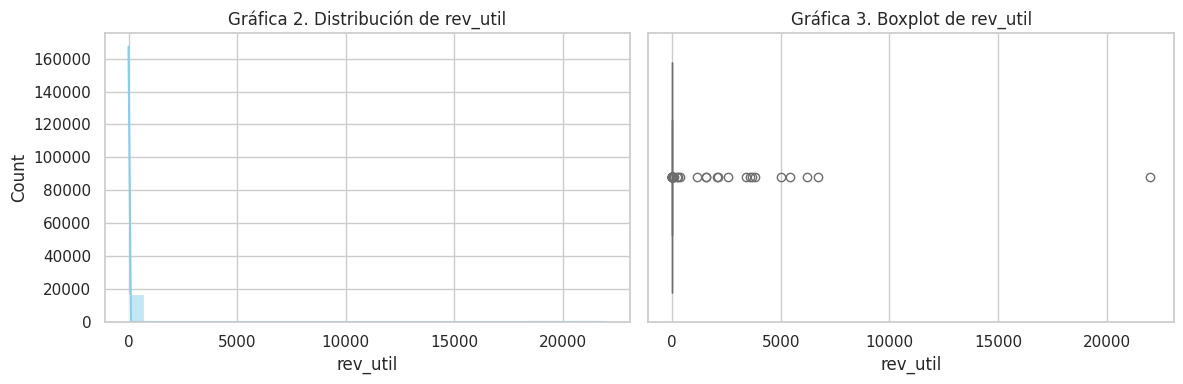

In [30]:
# Histograma y boxplot
plt.figure(figsize=(12, 4))

# Histograma
plt.subplot(1, 2, 1)
sns.histplot(data["rev_util"].dropna(), kde=True, bins=30, color="skyblue")
plt.title("Gráfica 2. Distribución de rev_util")
plt.xlabel("rev_util")

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=data["rev_util"].dropna(), color="salmon")
plt.title("Gráfica 3. Boxplot de rev_util")
plt.xlabel("rev_util")

plt.tight_layout()
plt.show()

Se observan valores atípicos extremadamente altos en rev_util: relación de utilización del crédito rotativo (saldo/límite de crédito). Este tipo de variable suele ir de 0 a 100% en la mayoría de los casos (FICO, 2011), pero algunos valores inusuales (posiblemente errores de captura) están estirando el eje X hasta más de 20,000%, lo cual distorsiona toda la visualización.

In [31]:
#Visualizar el número de casos típicos y extremos
print((data['rev_util'] <= 100).sum(), "casos ≤ 100%")
print((data['rev_util'] > 1).sum(), "casos > 1%")
print((data['rev_util'] > 5).sum(), "casos > 5%")
print((data['rev_util'] > 100).sum(), "casos > 100%")
print((data['rev_util'] > 200).sum(), "casos > 200%")
print((data['rev_util'] > 1000).sum(), "casos > 1000%")


16696 casos ≤ 100%
1166 casos > 1%
28 casos > 5%
18 casos > 100%
18 casos > 200%
15 casos > 1000%


Rango	Casos	Observación

-Menores o iguales a 100% = 16696 (mayoría de los casos — valores normales)

-Mayores a 100% =	18	(Posibles casos extremos/anómalos o outliers)

-Mayores a 200% =	18	(Ya considerados excesivos o erróneos)

-Mayores a 1000% =	15	(Muy probablemente datos erróneos o mal capturados)

De acuerdo a lo anterior, se procede a realizar un análisis con los valores filtrados de 0 a 200%, considerando que el resto de eventos corresponde a valores atípicos.

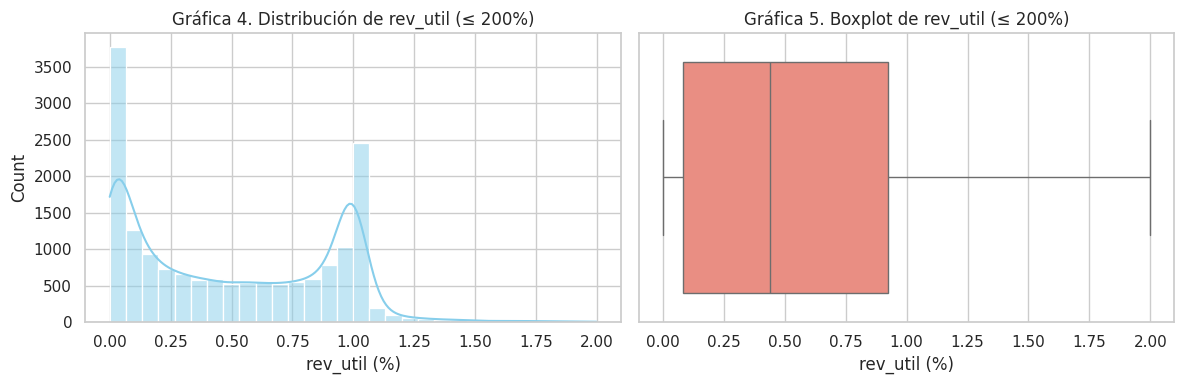

In [32]:
# Filtrar para distribución sin valores extremos
rev_util_clean = data[data["rev_util"] <= 2]  # 200%

plt.figure(figsize=(12, 4))

# Histograma
plt.subplot(1, 2, 1)
sns.histplot(rev_util_clean["rev_util"], bins=30, kde=True, color='skyblue')
plt.title("Gráfica 4. Distribución de rev_util (≤ 200%)")
plt.xlabel("rev_util (%)")

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=rev_util_clean["rev_util"], color='salmon')
plt.title("Gráfica 5. Boxplot de rev_util (≤ 200%)")
plt.xlabel("rev_util (%)")

plt.tight_layout()
plt.show()


**7.1.2 Análisis de variable: age**

---


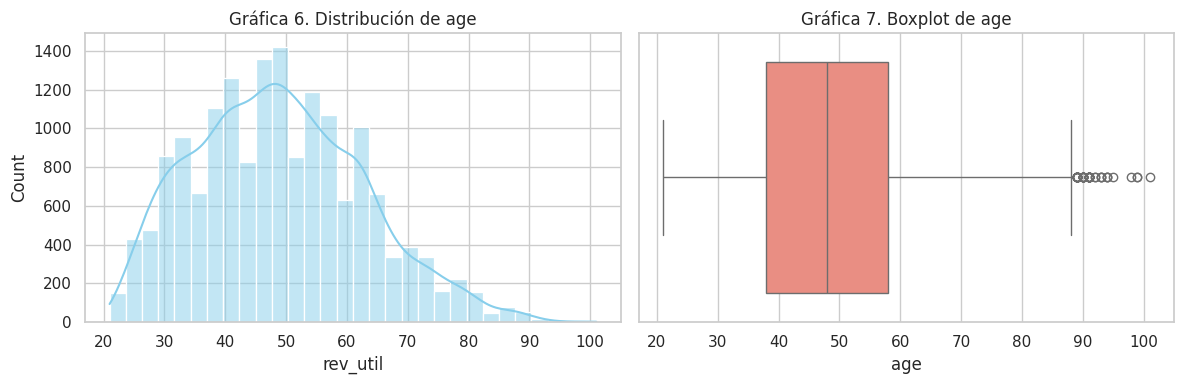

In [33]:
# Histograma y boxplot
plt.figure(figsize=(12, 4))

# Histograma
plt.subplot(1, 2, 1)
sns.histplot(data["age"].dropna(), kde=True, bins=30, color="skyblue")
plt.title("Gráfica 6. Distribución de age")
plt.xlabel("rev_util")

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=data["age"].dropna(), color="salmon")
plt.title("Gráfica 7. Boxplot de age")
plt.xlabel("age")

plt.tight_layout()
plt.show()

**7.1.3 Análisis de variable: late_30_59**

---


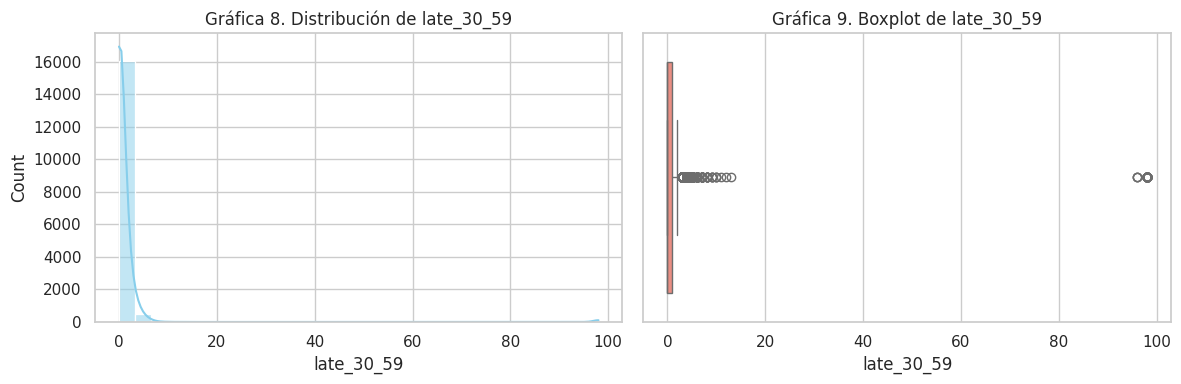

In [34]:
# Histograma y boxplot
plt.figure(figsize=(12, 4))

# Histograma
plt.subplot(1, 2, 1)
sns.histplot(data["late_30_59"].dropna(), kde=True, bins=30, color="skyblue")
plt.title("Gráfica 8. Distribución de late_30_59")
plt.xlabel("late_30_59")

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=data["late_30_59"].dropna(), color="salmon")
plt.title("Gráfica 9. Boxplot de late_30_59")
plt.xlabel("late_30_59")

plt.tight_layout()
plt.show()

**7.1.4 Análisis de variable: debt_ratio**

---


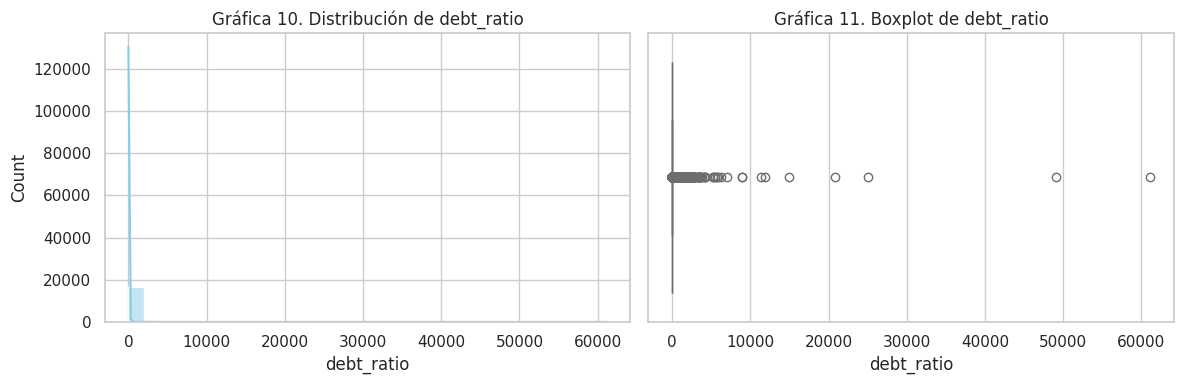

In [35]:
# Histograma y boxplot
plt.figure(figsize=(12, 4))

# Histograma
plt.subplot(1, 2, 1)
sns.histplot(data["debt_ratio"].dropna(), kde=True, bins=30, color="skyblue")
plt.title("Gráfica 10. Distribución de debt_ratio")
plt.xlabel("debt_ratio")

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=data["debt_ratio"].dropna(), color="salmon")
plt.title("Gráfica 11. Boxplot de debt_ratio")
plt.xlabel("debt_ratio")

plt.tight_layout()
plt.show()

**7.1.5 Análisis de variable: monthly_inc**

---


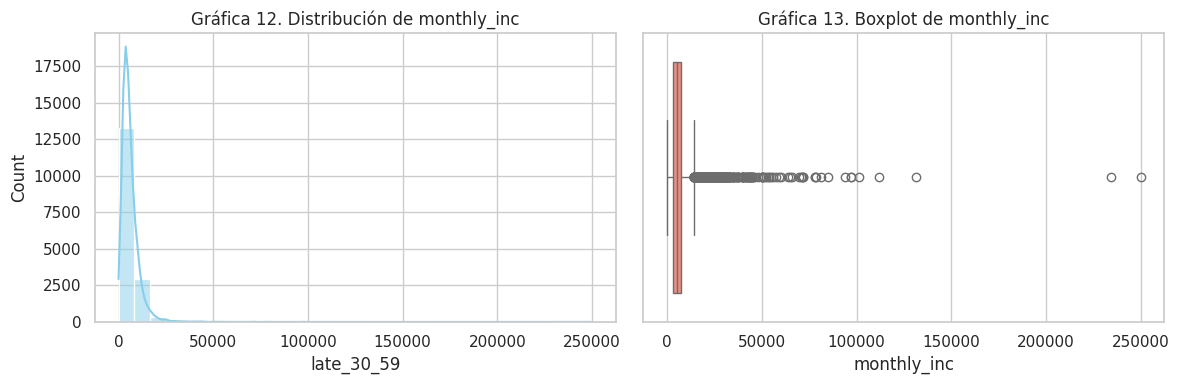

In [36]:
# Histograma y boxplot
plt.figure(figsize=(12, 4))

# Histograma
plt.subplot(1, 2, 1)
sns.histplot(data["monthly_inc"].dropna(), kde=True, bins=30, color="skyblue")
plt.title("Gráfica 12. Distribución de monthly_inc")
plt.xlabel("late_30_59")

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=data["monthly_inc"].dropna(), color="salmon")
plt.title("Gráfica 13. Boxplot de monthly_inc")
plt.xlabel("monthly_inc")

plt.tight_layout()
plt.show()

**7.1.6 Análisis de variable: open_credit**

---


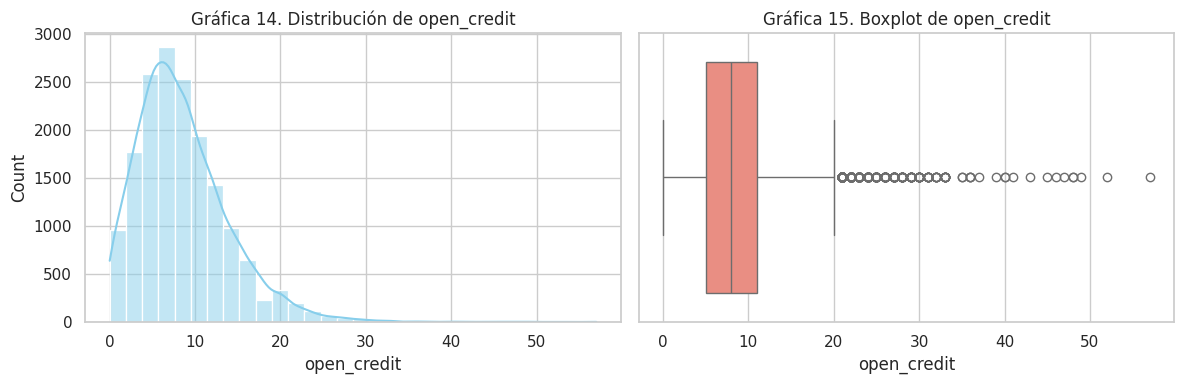

In [37]:
# Histograma y boxplot
plt.figure(figsize=(12, 4))

# Histograma
plt.subplot(1, 2, 1)
sns.histplot(data["open_credit"].dropna(), kde=True, bins=30, color="skyblue")
plt.title("Gráfica 14. Distribución de open_credit")
plt.xlabel("open_credit")

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=data["open_credit"].dropna(), color="salmon")
plt.title("Gráfica 15. Boxplot de open_credit")
plt.xlabel("open_credit")

plt.tight_layout()
plt.show()

**7.1.7 Análisis de variable: late_90**

---


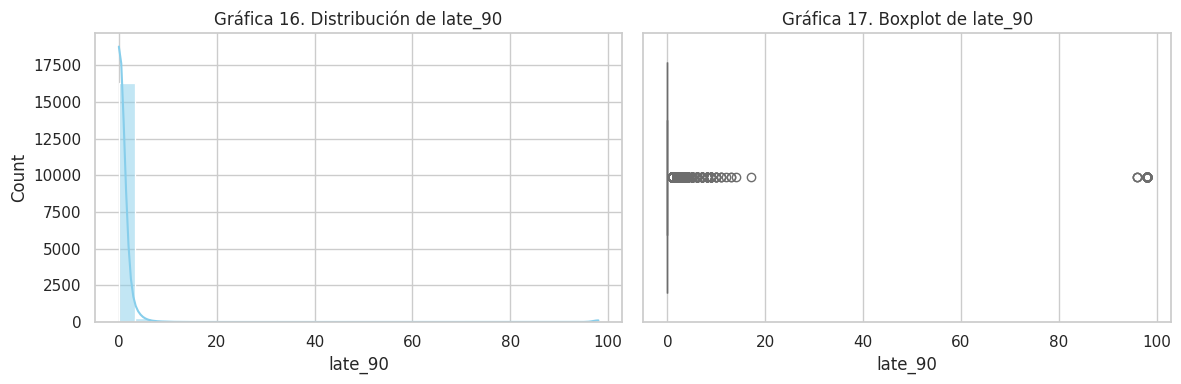

In [38]:
# Histograma y boxplot
plt.figure(figsize=(12, 4))

# Histograma
plt.subplot(1, 2, 1)
sns.histplot(data["late_90"].dropna(), kde=True, bins=30, color="skyblue")
plt.title("Gráfica 16. Distribución de late_90")
plt.xlabel("late_90")

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=data["late_90"].dropna(), color="salmon")
plt.title("Gráfica 17. Boxplot de late_90")
plt.xlabel("late_90")

plt.tight_layout()
plt.show()

**7.1.8 Análisis de variable: real_estate**

---


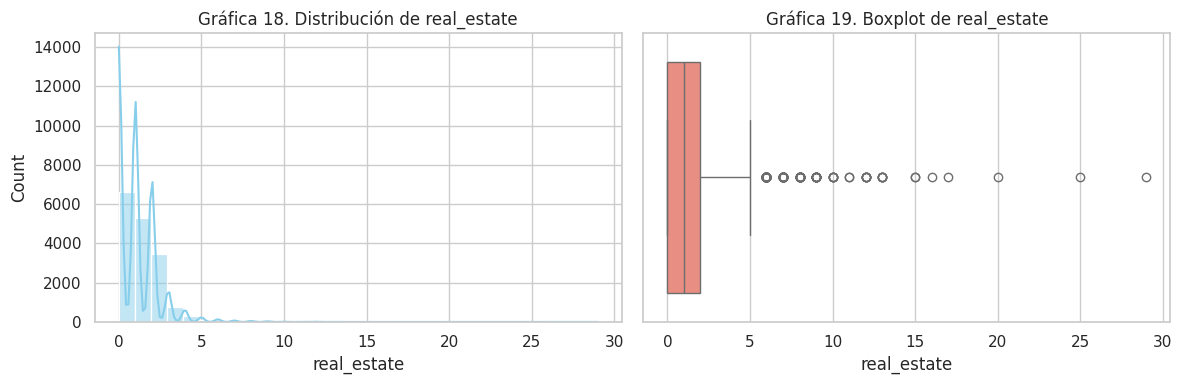

In [39]:
# Histograma y boxplot
plt.figure(figsize=(12, 4))

# Histograma
plt.subplot(1, 2, 1)
sns.histplot(data["real_estate"].dropna(), kde=True, bins=30, color="skyblue")
plt.title("Gráfica 18. Distribución de real_estate")
plt.xlabel("real_estate")

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=data["real_estate"].dropna(), color="salmon")
plt.title("Gráfica 19. Boxplot de real_estate")
plt.xlabel("real_estate")

plt.tight_layout()
plt.show()

**7.1.9 Análisis de variable: late_60_89**

---


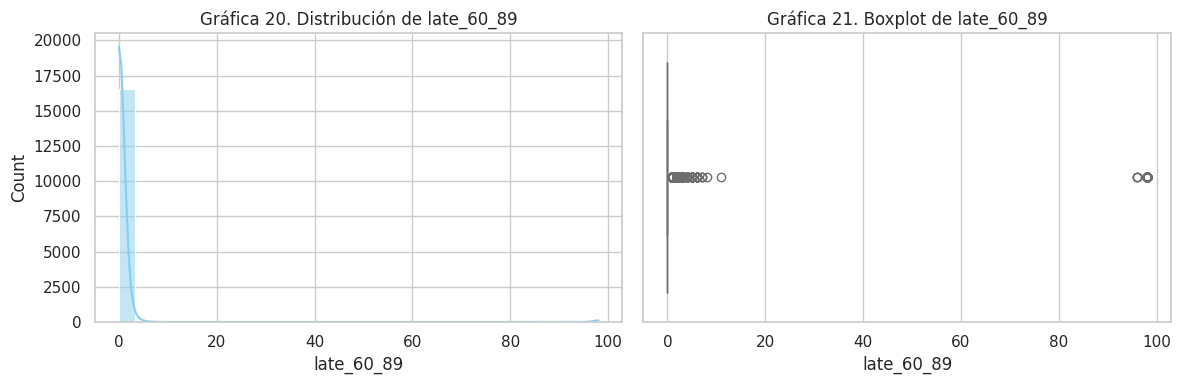

In [40]:
# Histograma y boxplot
plt.figure(figsize=(12, 4))

# Histograma
plt.subplot(1, 2, 1)
sns.histplot(data["late_60_89"].dropna(), kde=True, bins=30, color="skyblue")
plt.title("Gráfica 20. Distribución de late_60_89")
plt.xlabel("late_60_89")

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=data["late_60_89"].dropna(), color="salmon")
plt.title("Gráfica 21. Boxplot de late_60_89")
plt.xlabel("late_60_89")

plt.tight_layout()
plt.show()

**7.1.10 Análisis de variable: dependents**

---


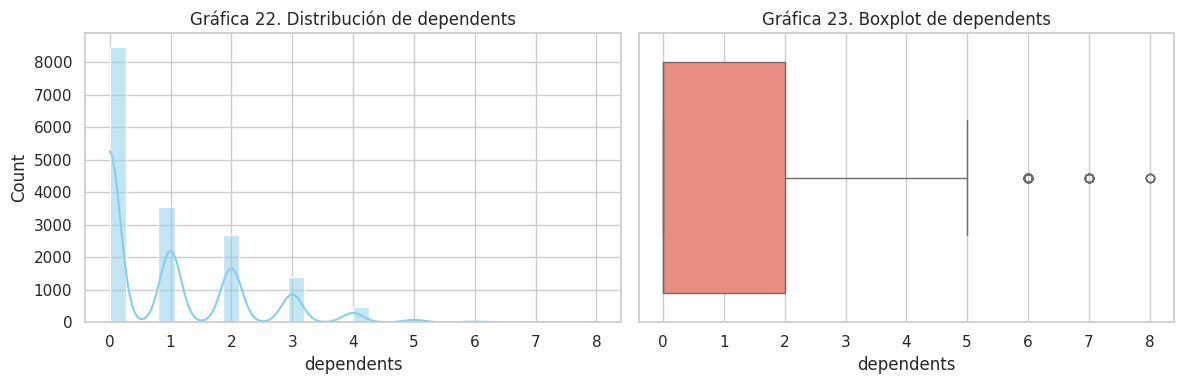

In [41]:
# Histograma y boxplot
plt.figure(figsize=(12, 4))

# Histograma
plt.subplot(1, 2, 1)
sns.histplot(data["dependents"].dropna(), kde=True, bins=30, color="skyblue")
plt.title("Gráfica 22. Distribución de dependents")
plt.xlabel("dependents")

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=data["dependents"].dropna(), color="salmon")
plt.title("Gráfica 23. Boxplot de dependents")
plt.xlabel("dependents")

plt.tight_layout()
plt.show()

**7.2 Análisis de variables categóricas**

---


Para las variables categóricas, calculamos la frecuencia de cada categoría y visualizamos su distribución con gráficos de barras.

In [42]:
#Descripción de variables
data.describe(include= 'category')

dlq_2yrs
count      16714
unique         2
top            0
freq        8357

In [43]:
# Frecuencias absolutas y relativas para la variable 'dlq_2yrs'
print("Frecuencias para dlq_2yrs:")
print(data['dlq_2yrs'].value_counts())  # Frecuencia absoluta
print(data['dlq_2yrs'].value_counts(normalize=True))  # Frecuencia relativa

Frecuencias para dlq_2yrs:
dlq_2yrs
0    8357
1    8357
Name: count, dtype: int64
dlq_2yrs
0    0.5
1    0.5
Name: proportion, dtype: float64


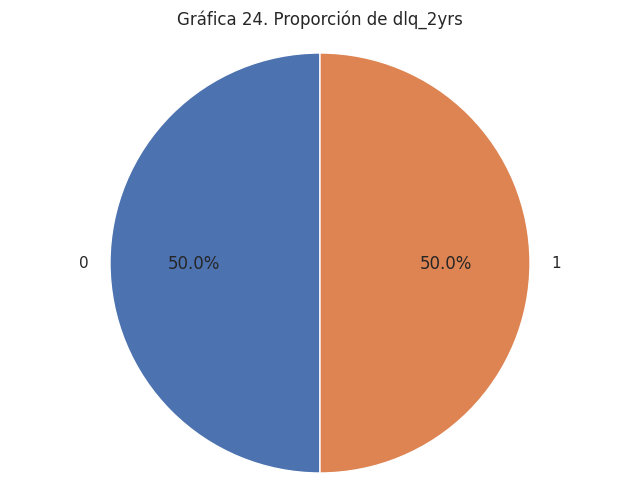

Proporciones para dlq_2yrs:
dlq_2yrs
0    50.0
1    50.0
Name: proportion, dtype: float64



In [44]:
# Gráfica de proporción para la variable 'dlq_2yrs'
proportions = data['dlq_2yrs'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 6))
plt.pie(proportions, labels=proportions.index, autopct='%1.1f%%', startangle=90)
plt.title('Gráfica 24. Proporción de dlq_2yrs')
plt.axis('equal')
plt.show()

print(f"Proporciones para dlq_2yrs:\n{proportions}\n")

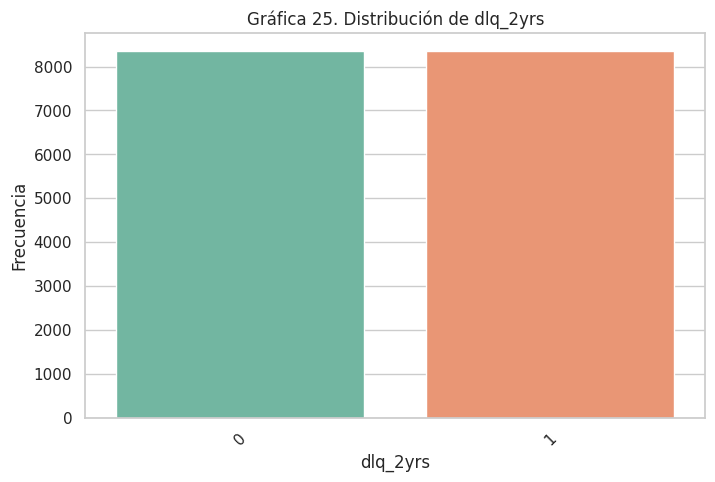

In [45]:
# Gráfico de barras para la variable categórica 'dlq_2yrs'
plt.figure(figsize=(8, 5))
sns.countplot(x='dlq_2yrs', data=data, palette='Set2')
plt.title('Gráfica 25. Distribución de dlq_2yrs')
plt.xlabel('dlq_2yrs')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()


**7.3 Observaciones de la  exploración de datos univariado**

---


- En cuanto al atributo rev_util: relación de utilización del crédito rotativo (saldo/límite de crédito), se observan valores atípicos extremadamente altos. Este tipo de variable suele ir de 0 a 100% en la mayoría de los casos (FICO, 2011), pero algunos valores inusuales (posiblemente errores de captura) están estirando el eje X hasta más de 20,000%, lo cual distorsiona toda la visualización. Una vez filtrados los datos entre 0 a 200% se observa que la mayoría de los datos están concentrados entre 0 y 1 (es decir, 0% a 100%). Esto es típico, ya que una utilización de crédito superior al 100% no es común ni saludable financieramente. Un pico muy marcado cerca de 0 sugiere que muchos individuos tienen una utilización muy baja (posiblemente nula). Otro pico alrededor de 1 (100%), lo que indica que muchos individuos están usando todo su crédito disponible, lo cual puede ser señal de riesgo financiero elevado o mal manejo del crédito. Aunque son pocos casos, existen individuos con una utilización superior al 100% (entre 100% y 200%), lo cual podría indicar sobreendeudamiento o exceso de gasto sobre el crédito disponible. Ver gráficas 02, 03, 04 y 05.

- En cuanto al atributo age: edad, se observa que la mayoría de los registros están en edades adultas intermedias (entre 30 y 60 años), lo que indica que la mayoría de los registros son de personas en edad laboral activa. El pico más alto de la distribución se encuentra en torno a los 50 años, la línea central del boxplot confirma que la mediana de la variable age está en torno a los 50 años, lo que coincide con el pico del histograma, es decir, ese es el grupo etario más frecuente en el dataset. Los datos de edad oscilan entre aproximadamente 20 y 100 años. Hay pocos casos por debajo de 25 y por encima de 85, posiblemente ouliers. Ver gráficas 06 y 07.

- En cuanto al atributo late_30_59: Número de veces que se ha vencido entre 30 y 59 días (peor que el actual), se puede observar que la gran mayoría de los valores están concentrados entre 0 y 1, con una cantidad importante de valores exactamente en 0 (lo que indica que muchos clientes nunca han tenido este tipo de atraso). Hay valores extremos (outliers), como se observa en el boxplot (valores como 98), que son poco frecuentes pero tienen un gran impacto en la media y la desviación estándar, esto probablemente representa un número muy pequeño de individuos con un historial crediticio particularmente malo o registros repetitivos (potencial error, el boxplot refuerza esta observación, con una gran cantidad de outliers claramente visibles. La media (1.11) no representa bien el comportamiento típico, porque el 50% de los casos tiene valor 0 (mediana = 0), lo anterior sugiere una distribución fuertemente sesgada, con una gran parte de los clientes con buen comportamiento (sin atrasos) y una minoría con un número elevado de incidentes. Ver gráficas 08 y 09.

- En cuanto al atributo debt_ratio: relación deuda-ingresos (o activos), se puede observar que la mayoría de los datos están muy cerca de 0, como se ve en el histograma, de igual forma el boxplot se aplana completamente en el extremo izquierdo, dado que la mayoría de los datos son pequeños. El índice de deuda sobre ingresos (debt_ratio) presenta una distribución con una gran concentración de valores bajos (entre 0 y 1), lo cual tiene sentido en contextos normales, sin embargo, hay valores extremos (outliers) muy grandes que empujan la media a 30.98, cuando la mediana es apenas 0.32, lo que indica una fuerte distorsión en los resúmenes estadísticos y visuales (Hand,1997), lo que hace necesario tratarlos antes de usar esta variable en modelos o análisis. El valor máximo es 61106.50, lo cual es anómalo para un ratio (deuda/ingresos). Como el 75% de los valores están por debajo de 0.53, cualquier valor por encima de 1 ya puede considerarse inusual, y cifras como las del máximo probablemente sean errores de captura o casos extremos. Ver gráficas 10 y 11.

- En cuanto al atributo monthly_inc: ingresos mensuales del prestatario, se puede observar que la distribución de los ingresos mensuales es altamente sesgada a la derecha (asimetría positiva). La gran mayoría de los registros se concentra entre los 0 y 15,000 dólares mensuales. La mediana es de 5,000, lo que indica que el 50% de los individuos gana menos de esa cantidad. Existen valores extremos, con algunos casos llegando hasta los 250,000, lo cual es raro y merece revisión, pues podrían ser errores o individuos con ingresos atípicos (ej. empresarios, altos ejecutivos). La presencia de tantos outliers indica una alta dispersión en los ingresos y la necesidad de revisar o transformar la variable si se usará en modelos estadísticos (Hand, 1997). Ver gráficas 12 y 13.

- En cuanto al atributo open_credit: número de líneas de crédito y préstamos abiertos, se puede observar que en el histograma la distribución es asimétrica a la derecha, con la mayoría de los individuos teniendo entre 5 y 11 líneas de crédito abiertas. Hay una caída rápida en la frecuencia a partir de los 15 créditos. Algunos individuos reportan más de 30 o incluso hasta 57 líneas de crédito abiertas, lo que se considera fuera de lo común y debe revisarse como posibles outliers. La caja (IQR) abarca valores entre 5 y 11 créditos abiertos, lo cual representa el 50% central de la muestra. El mínimo es 0, lo que podría corresponder a personas sin historial crediticio activo o datos faltantes tratados como ceros. El número de créditos abiertos es una métrica clave de actividad financiera y capacidad de manejo de deuda. Un número moderado de líneas puede ser indicativo de un comportamiento saludable, mientras que un número excesivo puede alertar sobre sobreendeudamiento potencial (Thomas, 2002).Ver gráficas 14 y 15.

- En cuanto al atributo late_90: número de veces que se ha retrasado 90 días o más un pago, se puede observar que en el histograma se presenta una distribución altamente sesgada a la derecha (positiva). La gran mayoría de los individuos nunca han estado 90 días o más en mora, el boxplot también confirma que el 75% de los individuos nunca han estado en mora severa. Pocos casos concentran múltiples moras extremas (más de 10, llegando incluso a 98), el punto extremo (98) es un outlier muy fuerte, que puede estar influenciado por errores de carga o representar perfiles crediticios de alto riesgo. Es una variable crítica en la predicción de riesgo crediticio, pues indica comportamiento severamente riesgoso (Anderson, 2007). Ver gráficas 16 y 17.

- En cuanto al atributo real_estate: número de préstamos inmobiliarios o líneas de crédito, se puede observar en el histograma que la mayoría de los individuos tienen entre 0 y 2 créditos o líneas de crédito inmobiliario (alrededor del 75%), el boxplot también indica que la distribución es concentrada en valores bajos, con una mediana en 1.  Se observa un claro sesgo a la derecha: conforme el número de créditos inmobiliarios aumenta, la frecuencia disminuye drásticamente. Hay algunos picos en valores específicos, lo que sugiere que ciertos valores (como 0, 1 y 2) son particularmente comunes. Hay outliers a partir del valor 6 aproximadamente, el valor máximo es 29, lo cual representa un caso extremo y atípico. Esta variable puede ser usada como un indicador de capacidad crediticia o carga de deuda estructurada en bienes raíces (Hand, 1997). Esta variable es discreta. Ver gráficas 18 y 19.

- En cuanto al atributo late_60_89: número de veces que se ha vencido entre 60 y 89 días (peor que el actual), se puede observar en el histograma una distribución de valores altamente sesgada a la derecha: la mayoría de los valores están en 0. Muy pocos valores tienen atrasos entre 60-89 días, lo que indica que la gran mayoría de los prestatarios no ha tenido este tipo de incumplimiento. En el boxplot se observa gran cantidad de valores atípicos (outliers). El valor máximo de 98 es extremadamente alto comparado con la mediana (0), lo que sugiere la presencia de unos pocos individuos con atrasos severos o frecuentes. Los percentiles 25, 50 y 75 son todos 0, lo que indica que al menos el 75% de los casos nunca ha tenido atrasos de 60-89 días. Es una variable numérica discreta, pero altamente desbalanceada. La media está sesgada por unos pocos valores muy altos. El comportamiento de esta variable probablemente esté más cerca de una binaria en la mayoría de los casos: ha tenido o no ha tenido atrasos. Ver gráficas 20 y 21.

- En cuanto al atributo dependents: número de dependientes, se puede observar en el histograma una concentración muy alta en 0 dependientes (más de 8000 observaciones), con disminución progresiva hasta 3 o 4 dependientes. A partir de 5 dependientes, la frecuencia es muy baja (valores atípicos o extremos). En el boxplot se puede apreciar que la mediana está en 0, lo que refuerza la concentración de observaciones sin dependientes. La mayoría de los datos se encuentra entre 0 y 2 dependientes. Hay valores atípicos (outliers) a partir de 6, 7 y 8 dependientes. Lo anterior expuesto expone que la distribución de valores está altamente sesgada a la izquierda (asimétrica positiva), con mayoría de personas sin dependientes. Aunque es una variable numérica discreta, puede mantenerse como numérica para ciertos modelos. Sin embargo, también se presta para categorizar (FICO, 2011). Ver gráficas 22 y 23.

- En cuanto al atributo dlq_2yrs: Variable objetivo que indica si ocurrió una delincuencia grave en los próximos 2 años (0 = No, 1 = Sí), se puede apreciar que el gráfico de pastel muestra una división exacta del 50% entre las personas que sí tuvieron moras (1) y las que no tuvieron (0). Al ser una variable relacionada con la morosidad en el pasado, puede ser altamente predictiva de futuros comportamientos crediticios o de riesgo financiero. Ver gráficas 24 y 25.





---

In [46]:
print(data["dependents"].describe())


count    16714.000000
mean         0.944358
std          1.198791
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max          8.000000
Name: dependents, dtype: float64


## **8. Exploración de datos multivariado**

**8.1 Valores (mínimo, máximo, media y mediana) de atributos (numéricos)**


---



Esto nos permite tener un panorama general de la distribución (si es normal o no) de los atributos numéricos (rev_util, age, debt_ratio, monthly_inc, open_credit, real_estate, dependents, late_30_59, late_60_89, late_90).<br>
En una distribución normal, la (media y la mediana) son aproximadamente iguales; y las diferencias entre la (media y la mediana) con los rangos (mínimos y máximos) no son tan extremas.

In [47]:
# Se verifica que los atributos (rev_util, age, debt_ratio, monthly_inc, open_credit, real_estate, dependents, late_30_59, late_60_89, late_90)
# sean de tipo (numérico) para poder calcular la (Media y mediana)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16714 entries, 0 to 16713
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   rev_util     16714 non-null  float64 
 1   age          16714 non-null  float64 
 2   late_30_59   16714 non-null  float64 
 3   debt_ratio   16714 non-null  float64 
 4   monthly_inc  16714 non-null  float64 
 5   open_credit  16714 non-null  float64 
 6   late_90      16714 non-null  float64 
 7   real_estate  16714 non-null  float64 
 8   late_60_89   16714 non-null  float64 
 9   dependents   16714 non-null  float64 
 10  dlq_2yrs     16714 non-null  category
dtypes: category(1), float64(10)
memory usage: 1.3 MB


In [48]:
# Valor mínimo, máximo, media y mediana de los atributos (rev_util, age)

print("\033[1;91mrev_util\033[0m")
variable = data["rev_util"]
valor = variable.min()
print(f"mínima:\t\t{valor}")
valor = variable.max()
print(f"máximo:\t\t{valor}")
valor = variable.mean()
print(f"media:\t\t{valor}")
valor = variable.median()
print(f"mediana:\t{valor}\n")

print("\033[1;91mage\033[0m")
variable = data["age"]
valor = variable.min()
print(f"mínima:\t\t{valor}")
valor = variable.max()
print(f"máximo:\t\t{valor}")
valor = variable.mean()
print(f"media:\t\t{valor}")
valor = variable.median()
print(f"mediana:\t{valor}\n")

print("\033[1;91mdebt_ratio\033[0m")
variable = data["debt_ratio"]
valor = variable.min()
print(f"mínima:\t\t{valor}")
valor = variable.max()
print(f"máximo:\t\t{valor}")
valor = variable.mean()
print(f"media:\t\t{valor}")
valor = variable.median()
print(f"mediana:\t{valor}\n")

print("\033[1;91mmonthly_inc\033[0m")
variable = data["monthly_inc"]
valor = variable.min()
print(f"mínima:\t\t{valor}")
valor = variable.max()
print(f"máximo:\t\t{valor}")
valor = variable.mean()
print(f"media:\t\t{valor}")
valor = variable.median()
print(f"mediana:\t{valor}\n")

print("\033[1;91mopen_credit\033[0m")
variable = data["open_credit"]
valor = variable.min()
print(f"mínima:\t\t{valor}")
valor = variable.max()
print(f"máximo:\t\t{valor}")
valor = variable.mean()
print(f"media:\t\t{valor}")
valor = variable.median()
print(f"mediana:\t{valor}\n")

print("\033[1;91mreal_estate\033[0m")
variable = data["real_estate"]
valor = variable.min()
print(f"mínima:\t\t{valor}")
valor = variable.max()
print(f"máximo:\t\t{valor}")
valor = variable.mean()
print(f"media:\t\t{valor}")
valor = variable.median()
print(f"mediana:\t{valor}\n")

print("\033[1;91mdependents\033[0m")
variable = data["dependents"]
valor = variable.min()
print(f"mínima:\t\t{valor}")
valor = variable.max()
print(f"máximo:\t\t{valor}")
valor = variable.mean()
print(f"media:\t\t{valor}")
valor = variable.median()
print(f"mediana:\t{valor}\n")

print("\033[1;91mlate_30_59\033[0m")
variable = data["late_30_59"]
valor = variable.min()
print(f"mínima:\t\t{valor}")
valor = variable.max()
print(f"máximo:\t\t{valor}")
valor = variable.mean()
print(f"media:\t\t{valor}")
valor = variable.median()
print(f"mediana:\t{valor}\n")

print("\033[1;91mlate_60_89\033[0m")
variable = data["late_60_89"]
valor = variable.min()
print(f"mínima:\t\t{valor}")
valor = variable.max()
print(f"máximo:\t\t{valor}")
valor = variable.mean()
print(f"media:\t\t{valor}")
valor = variable.median()
print(f"mediana:\t{valor}\n")

print("\033[1;91mlate_90\033[0m")
variable = data["late_90"]
valor = variable.min()
print(f"mínima:\t\t{valor}")
valor = variable.max()
print(f"máximo:\t\t{valor}")
valor = variable.mean()
print(f"media:\t\t{valor}")
valor = variable.median()
print(f"mediana:\t{valor}\n")

rev_util
mínima:		0.0
máximo:		22000.0
media:		4.799861546277432
mediana:	0.4430804445

age
mínima:		21.0
máximo:		101.0
media:		48.79867177216705
mediana:	48.0

debt_ratio
mínima:		0.0
máximo:		61106.5
media:		30.980298201393204
mediana:	0.3222994135

monthly_inc
mínima:		0.0
máximo:		250000.0
media:		6118.120258465957
mediana:	5000.0

open_credit
mínima:		0.0
máximo:		57.0
media:		8.503709465119062
mediana:	8.0

real_estate
mínima:		0.0
máximo:		29.0
media:		1.0474452554744527
mediana:	1.0

dependents
mínima:		0.0
máximo:		8.0
media:		0.944358023214072
mediana:	0.0

late_30_59
mínima:		0.0
máximo:		98.0
media:		1.1102668421682422
mediana:	0.0

late_60_89
mínima:		0.0
máximo:		98.0
media:		0.7343544334091181
mediana:	0.0

late_90
mínima:		0.0
máximo:		98.0
media:		0.8638267320808902
mediana:	0.0



Se observa que los atributos (age, open_credit y real_estate) tienen una distribución normal o simétrica (Con valores típicos).  Y los atributos (rev_util, debt_ratio, monthly_inc, dependents, late_30_59, late_60_89, late_90) tienen una distribución sesgada o con valores atípicos extremos.

**8.1.1 Distribuciones normales o con valores típicos (Media y mediana cercanos, y sin diferencias extremas con los valores mínimos y máximos):**


---



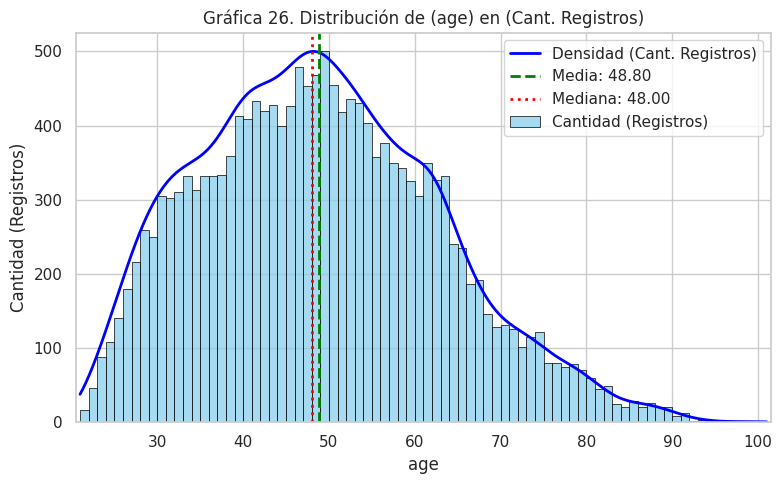

In [49]:
# Cant. registros por (age)
plt.figure(figsize=(8, 5))

variable = data["age"]
valor_min = variable.min()
valor_max = variable.max()
valor_media = variable.mean()
valor_mediana = variable.median()

# Histograma (cantidad de registros)
sns.histplot(variable, bins=np.arange(valor_min, valor_max + 2), color='skyblue',
             kde=False, stat='count', label='Cantidad (Registros)', edgecolor='black')

# Calcular y graficar curva de densidad escalada
kde = gaussian_kde(variable)
x_vals = np.linspace(variable.min(), variable.max(), 1000)
y_vals = kde(x_vals)

# Escalar la densidad para ajustarse el histograma
conteos, _ = np.histogram(variable, bins=np.arange(valor_min, valor_max + 2))
factor_escala = max(conteos) / max(y_vals)
y_vals_escalados = y_vals * factor_escala
plt.plot(x_vals, y_vals_escalados, color='blue', linewidth=2, label='Densidad (Cant. Registros)')

# Líneas de media y mediana
plt.axvline(valor_media, color='green', linestyle='--', linewidth=2, label=f"Media: {valor_media:.2f}")
plt.axvline(valor_mediana, color='red', linestyle=':', linewidth=2, label=f"Mediana: {valor_mediana:.2f}")

# Personalización del gráfico
plt.title("Gráfica 26. Distribución de (age) en (Cant. Registros)")
plt.xlabel("age")
plt.ylabel("Cantidad (Registros)")
plt.legend()
plt.xlim(valor_min - 0.5, valor_max + 0.5)
plt.grid(True)
plt.tight_layout()
plt.show()

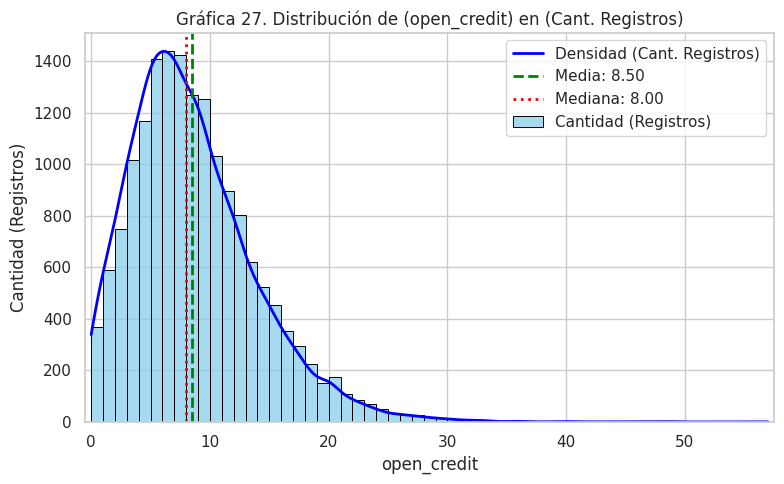

In [50]:
# Cant. registros por (open_credit)
plt.figure(figsize=(8, 5))

variable = data["open_credit"]
valor_min = variable.min()
valor_max = variable.max()
valor_media = variable.mean()
valor_mediana = variable.median()

# Histograma (cantidad de registros)
sns.histplot(variable, bins=np.arange(valor_min, valor_max + 2), color='skyblue',
             kde=False, stat='count', label='Cantidad (Registros)', edgecolor='black')

# Calcular y graficar curva de densidad escalada
kde = gaussian_kde(variable)
x_vals = np.linspace(variable.min(), variable.max(), 1000)
y_vals = kde(x_vals)

# Escalar la densidad para ajustarse el histograma
conteos, _ = np.histogram(variable, bins=np.arange(valor_min, valor_max + 2))
factor_escala = max(conteos) / max(y_vals)
y_vals_escalados = y_vals * factor_escala
plt.plot(x_vals, y_vals_escalados, color='blue', linewidth=2, label='Densidad (Cant. Registros)')

# Líneas de media y mediana
plt.axvline(valor_media, color='green', linestyle='--', linewidth=2, label=f"Media: {valor_media:.2f}")
plt.axvline(valor_mediana, color='red', linestyle=':', linewidth=2, label=f"Mediana: {valor_mediana:.2f}")

# Personalización del gráfico
plt.title("Gráfica 27. Distribución de (open_credit) en (Cant. Registros)")
plt.xlabel("open_credit")
plt.ylabel("Cantidad (Registros)")
plt.legend()
plt.xlim(valor_min - 0.5, valor_max + 0.5)
plt.grid(True)
plt.tight_layout()
plt.show()

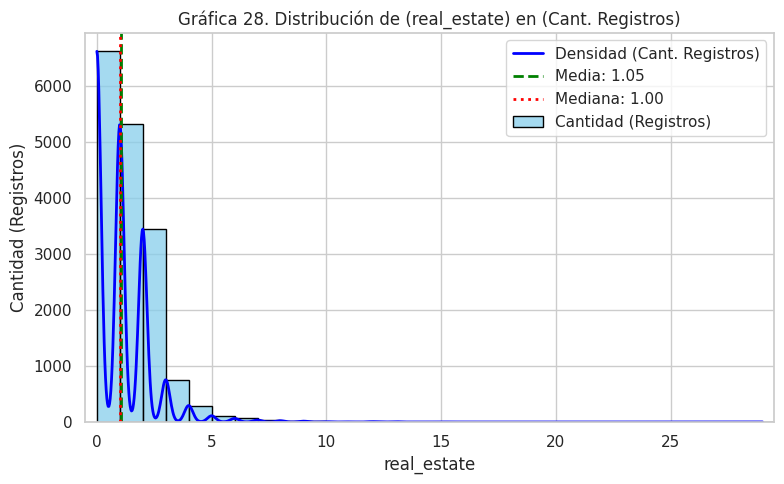

In [51]:
# Cant. registros por (real_estate)
plt.figure(figsize=(8, 5))

variable = data["real_estate"]
valor_min = variable.min()
valor_max = variable.max()
valor_media = variable.mean()
valor_mediana = variable.median()

# Histograma (cantidad de registros)
sns.histplot(variable, bins=np.arange(valor_min, valor_max + 2), color='skyblue',
             kde=False, stat='count', label='Cantidad (Registros)', edgecolor='black')

# Calcular y graficar curva de densidad escalada
kde = gaussian_kde(variable)
x_vals = np.linspace(variable.min(), variable.max(), 1000)
y_vals = kde(x_vals)

# Escalar la densidad para ajustarse el histograma
conteos, _ = np.histogram(variable, bins=np.arange(valor_min, valor_max + 2))
factor_escala = max(conteos) / max(y_vals)
y_vals_escalados = y_vals * factor_escala
plt.plot(x_vals, y_vals_escalados, color='blue', linewidth=2, label='Densidad (Cant. Registros)')

# Líneas de media y mediana
plt.axvline(valor_media, color='green', linestyle='--', linewidth=2, label=f"Media: {valor_media:.2f}")
plt.axvline(valor_mediana, color='red', linestyle=':', linewidth=2, label=f"Mediana: {valor_mediana:.2f}")

# Personalización del gráfico
plt.title("Gráfica 28. Distribución de (real_estate) en (Cant. Registros)")
plt.xlabel("real_estate")
plt.ylabel("Cantidad (Registros)")
plt.legend()
plt.xlim(valor_min - 0.5, valor_max + 0.5)
plt.grid(True)
plt.tight_layout()
plt.show()

Se observa que el atributo (age) es el que más se acerca a una districución normal con una media de (48.80) y una mediana de (48.0).<br>
El atributo (open_credit) tiene una media de (8.50) y una mediana de (8.0) que también son relativamente cercanas y podría tener una distribución simétrica; sin embargo, la presencia de valores atípicos en este caso, podría influir en la distribución.<br>
El atributo (real_estate) tiene una media de (1.05) y una mediana de (1.0); esto indica que gran parte de sus datos se agrupan al rededor de (1).

**8.1.2 Distribuciones con valores atípicos (Media y mediana lejanos, y/o con diferencias extremas con respecto a los valores mínimos y máximos):**


---



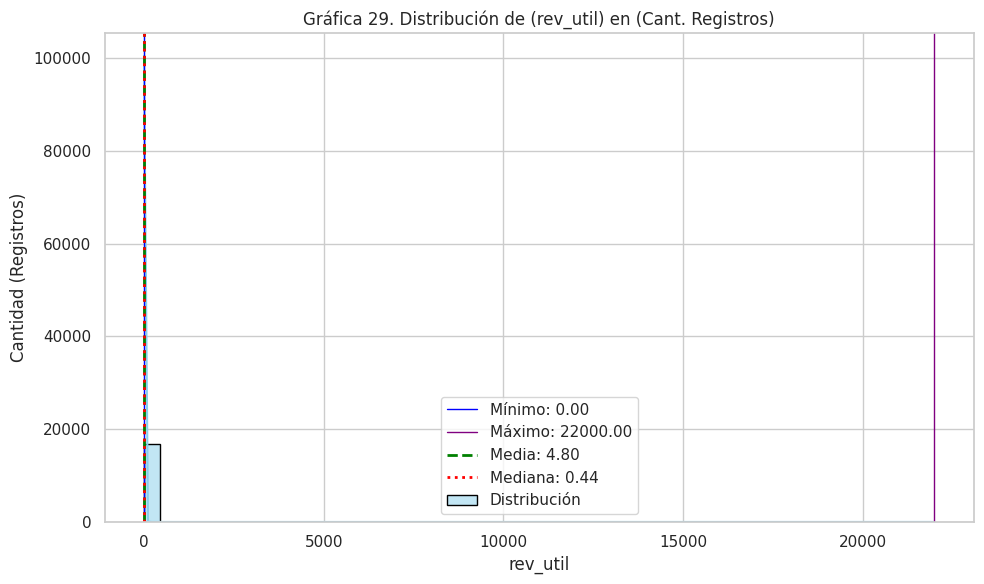

In [52]:
# Gráfica para (rev_util)

# Tamaño de la gráfica
plt.figure(figsize=(10, 6))

variable = data["rev_util"]
valor_min = variable.min()
valor_max = variable.max()
valor_media = variable.mean()
valor_mediana = variable.median()

# Histograma con KDE
sns.histplot(variable.dropna(), bins=50, kde=True, color="skyblue", edgecolor="black", label='Distribución')

# Líneas (Mínimo, Máximo, Media y Mediana) para leyenda
plt.axvline(valor_min, color='blue', linestyle='-', linewidth=1, label=f"Mínimo: {valor_min:.2f}")
plt.axvline(valor_max, color='purple', linestyle='-', linewidth=1, label=f"Máximo: {valor_max:.2f}")
plt.axvline(valor_media, color='green', linestyle='--', linewidth=2, label=f"Media: {valor_media:.2f}")
plt.axvline(valor_mediana, color='red', linestyle=':', linewidth=2, label=f"Mediana: {valor_mediana:.2f}")

# Personalización del gráfico
plt.title("Gráfica 29. Distribución de (rev_util) en (Cant. Registros)")
plt.xlabel("rev_util")
plt.ylabel("Cantidad (Registros)")
plt.legend() # Muestra la leyenda con todos los labels
# Ajuste del límite del eje X para valores extremos
# plt.xlim(-100, 300) # Ejemplo de ajuste de límite
plt.grid(True)
plt.tight_layout()
plt.show()

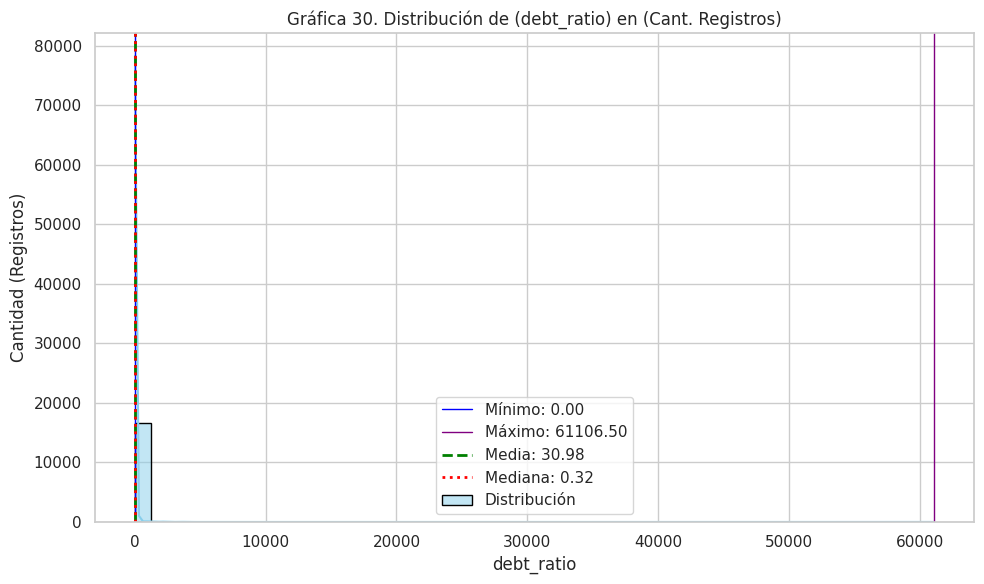

In [53]:
# Gráfica para (debt_ratio)

# Tamaño de la gráfica
plt.figure(figsize=(10, 6))

variable = data["debt_ratio"]
valor_min = variable.min()
valor_max = variable.max()
valor_media = variable.mean()
valor_mediana = variable.median()

# Histograma con KDE
sns.histplot(variable.dropna(), bins=50, kde=True, color="skyblue", edgecolor="black", label='Distribución')

# Líneas (Mínimo, Máximo, Media y Mediana) para leyenda
plt.axvline(valor_min, color='blue', linestyle='-', linewidth=1, label=f"Mínimo: {valor_min:.2f}")
plt.axvline(valor_max, color='purple', linestyle='-', linewidth=1, label=f"Máximo: {valor_max:.2f}")
plt.axvline(valor_media, color='green', linestyle='--', linewidth=2, label=f"Media: {valor_media:.2f}")
plt.axvline(valor_mediana, color='red', linestyle=':', linewidth=2, label=f"Mediana: {valor_mediana:.2f}")

# Personalización del gráfico
plt.title("Gráfica 30. Distribución de (debt_ratio) en (Cant. Registros)")
plt.xlabel("debt_ratio")
plt.ylabel("Cantidad (Registros)")
plt.legend() # Muestra la leyenda con todos los labels
# Ajuste del límite del eje X para valores extremos
# plt.xlim(-100, 300) # Ejemplo de ajuste de límite
plt.grid(True)
plt.tight_layout()
plt.show()

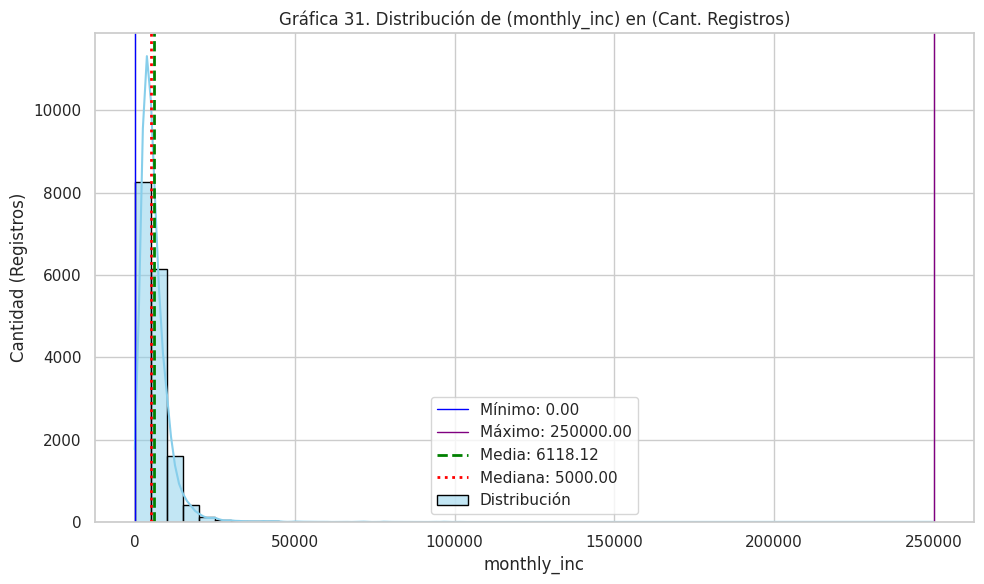

In [54]:
# Gráfica para (monthly_inc)

# Tamaño de la gráfica
plt.figure(figsize=(10, 6))

variable = data["monthly_inc"]
valor_min = variable.min()
valor_max = variable.max()
valor_media = variable.mean()
valor_mediana = variable.median()

# Histograma con KDE
sns.histplot(variable.dropna(), bins=50, kde=True, color="skyblue", edgecolor="black", label='Distribución')

# Líneas (Mínimo, Máximo, Media y Mediana) para leyenda
plt.axvline(valor_min, color='blue', linestyle='-', linewidth=1, label=f"Mínimo: {valor_min:.2f}")
plt.axvline(valor_max, color='purple', linestyle='-', linewidth=1, label=f"Máximo: {valor_max:.2f}")
plt.axvline(valor_media, color='green', linestyle='--', linewidth=2, label=f"Media: {valor_media:.2f}")
plt.axvline(valor_mediana, color='red', linestyle=':', linewidth=2, label=f"Mediana: {valor_mediana:.2f}")

# Personalización del gráfico
plt.title("Gráfica 31. Distribución de (monthly_inc) en (Cant. Registros)")
plt.xlabel("monthly_inc")
plt.ylabel("Cantidad (Registros)")
plt.legend() # Muestra la leyenda con todos los labels
# Ajuste del límite del eje X para valores extremos
# plt.xlim(-100, 300) # Ejemplo de ajuste de límite
plt.grid(True)
plt.tight_layout()
plt.show()

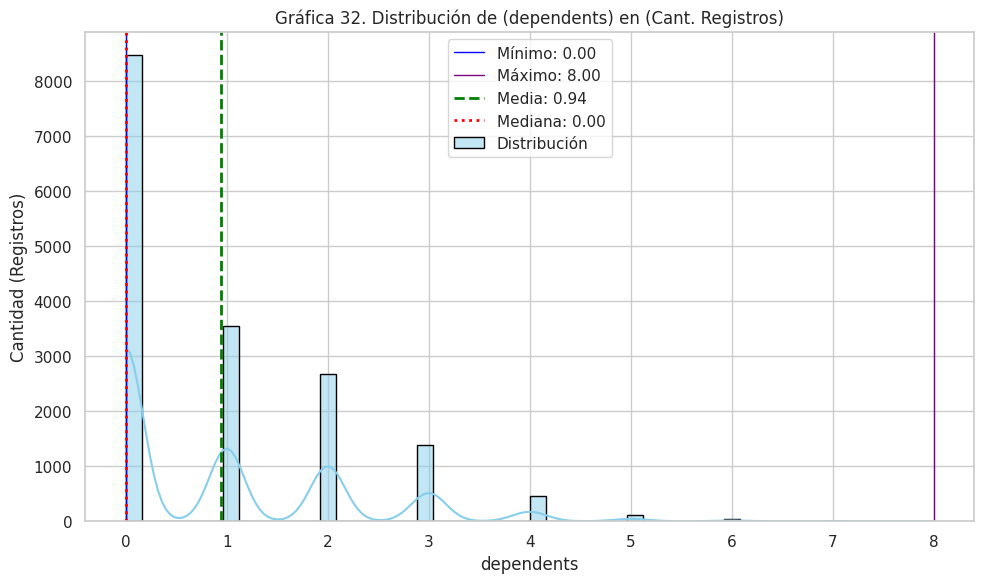

In [55]:
# Gráfica para (dependents)

# Tamaño de la gráfica
plt.figure(figsize=(10, 6))

variable = data["dependents"]
valor_min = variable.min()
valor_max = variable.max()
valor_media = variable.mean()
valor_mediana = variable.median()

# Histograma con KDE
sns.histplot(variable.dropna(), bins=50, kde=True, color="skyblue", edgecolor="black", label='Distribución')

# Líneas (Mínimo, Máximo, Media y Mediana) para leyenda
plt.axvline(valor_min, color='blue', linestyle='-', linewidth=1, label=f"Mínimo: {valor_min:.2f}")
plt.axvline(valor_max, color='purple', linestyle='-', linewidth=1, label=f"Máximo: {valor_max:.2f}")
plt.axvline(valor_media, color='green', linestyle='--', linewidth=2, label=f"Media: {valor_media:.2f}")
plt.axvline(valor_mediana, color='red', linestyle=':', linewidth=2, label=f"Mediana: {valor_mediana:.2f}")

# Personalización del gráfico
plt.title("Gráfica 32. Distribución de (dependents) en (Cant. Registros)")
plt.xlabel("dependents")
plt.ylabel("Cantidad (Registros)")
plt.legend() # Muestra la leyenda con todos los labels
# Ajuste del límite del eje X para valores extremos
# plt.xlim(-100, 300) # Ejemplo de ajuste de límite
plt.grid(True)
plt.tight_layout()
plt.show()

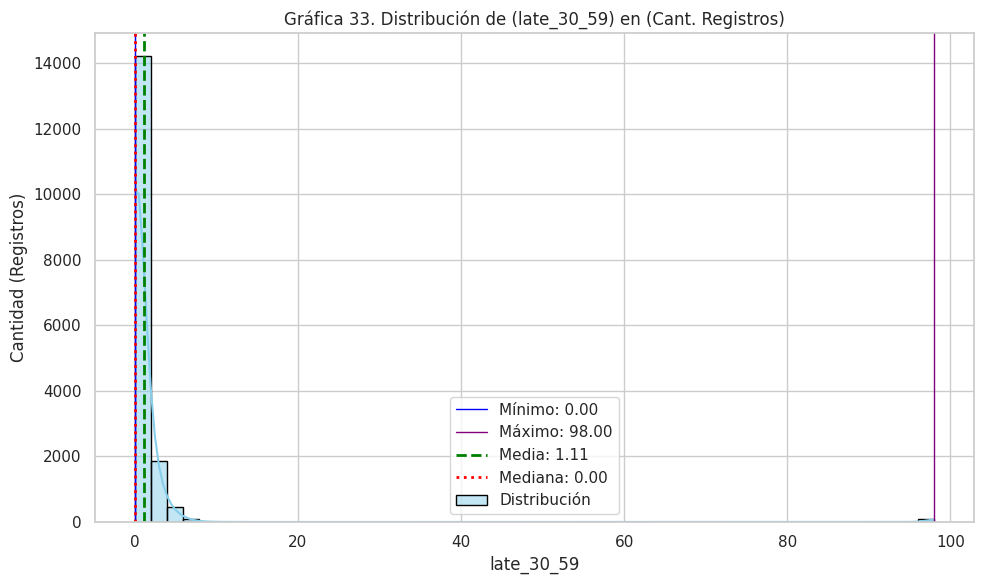

In [56]:
# Gráfica para (late_30_59)

# Tamaño de la gráfica
plt.figure(figsize=(10, 6))

variable = data["late_30_59"]
valor_min = variable.min()
valor_max = variable.max()
valor_media = variable.mean()
valor_mediana = variable.median()

# Histograma con KDE
sns.histplot(variable.dropna(), bins=50, kde=True, color="skyblue", edgecolor="black", label='Distribución')

# Líneas (Mínimo, Máximo, Media y Mediana) para leyenda
plt.axvline(valor_min, color='blue', linestyle='-', linewidth=1, label=f"Mínimo: {valor_min:.2f}")
plt.axvline(valor_max, color='purple', linestyle='-', linewidth=1, label=f"Máximo: {valor_max:.2f}")
plt.axvline(valor_media, color='green', linestyle='--', linewidth=2, label=f"Media: {valor_media:.2f}")
plt.axvline(valor_mediana, color='red', linestyle=':', linewidth=2, label=f"Mediana: {valor_mediana:.2f}")

# Personalización del gráfico
plt.title("Gráfica 33. Distribución de (late_30_59) en (Cant. Registros)")
plt.xlabel("late_30_59")
plt.ylabel("Cantidad (Registros)")
plt.legend() # Muestra la leyenda con todos los labels
# Ajuste del límite del eje X para valores extremos
# plt.xlim(-100, 300) # Ejemplo de ajuste de límite
plt.grid(True)
plt.tight_layout()
plt.show()

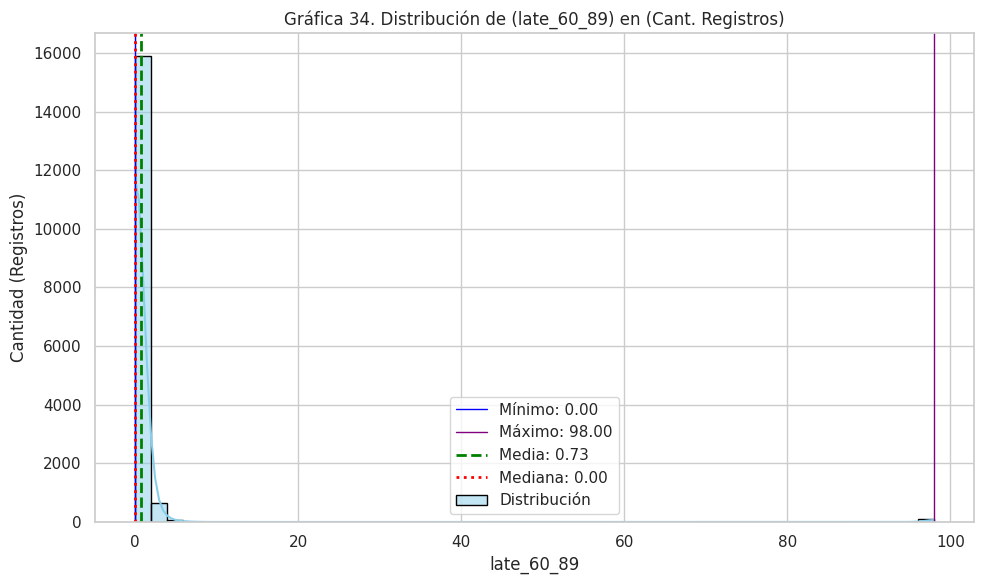

In [57]:
# Gráfica para (late_60_89)

# Tamaño de la gráfica
plt.figure(figsize=(10, 6))

variable = data["late_60_89"]
valor_min = variable.min()
valor_max = variable.max()
valor_media = variable.mean()
valor_mediana = variable.median()

# Histograma con KDE
sns.histplot(variable.dropna(), bins=50, kde=True, color="skyblue", edgecolor="black", label='Distribución')

# Líneas (Mínimo, Máximo, Media y Mediana) para leyenda
plt.axvline(valor_min, color='blue', linestyle='-', linewidth=1, label=f"Mínimo: {valor_min:.2f}")
plt.axvline(valor_max, color='purple', linestyle='-', linewidth=1, label=f"Máximo: {valor_max:.2f}")
plt.axvline(valor_media, color='green', linestyle='--', linewidth=2, label=f"Media: {valor_media:.2f}")
plt.axvline(valor_mediana, color='red', linestyle=':', linewidth=2, label=f"Mediana: {valor_mediana:.2f}")

# Personalización del gráfico
plt.title("Gráfica 34. Distribución de (late_60_89) en (Cant. Registros)")
plt.xlabel("late_60_89")
plt.ylabel("Cantidad (Registros)")
plt.legend() # Muestra la leyenda con todos los labels
# Ajuste del límite del eje X para valores extremos
# plt.xlim(-100, 300) # Ejemplo de ajuste de límite
plt.grid(True)
plt.tight_layout()
plt.show()

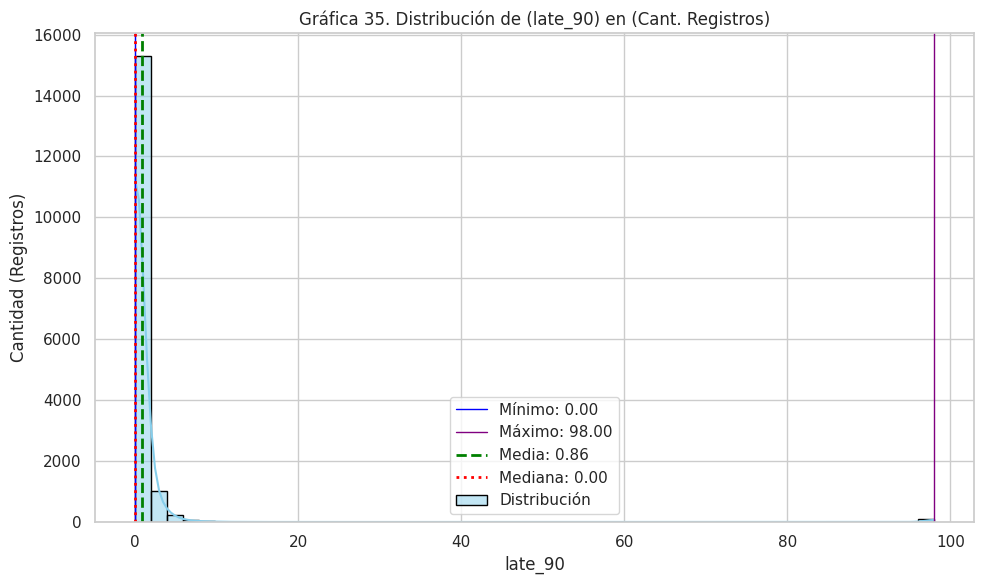

In [58]:
# Gráfica para (late_90)

# Tamaño de la gráfica
plt.figure(figsize=(10, 6))

variable = data["late_90"]
valor_min = variable.min()
valor_max = variable.max()
valor_media = variable.mean()
valor_mediana = variable.median()

# Histograma con KDE
sns.histplot(variable.dropna(), bins=50, kde=True, color="skyblue", edgecolor="black", label='Distribución')

# Líneas (Mínimo, Máximo, Media y Mediana) para leyenda
plt.axvline(valor_min, color='blue', linestyle='-', linewidth=1, label=f"Mínimo: {valor_min:.2f}")
plt.axvline(valor_max, color='purple', linestyle='-', linewidth=1, label=f"Máximo: {valor_max:.2f}")
plt.axvline(valor_media, color='green', linestyle='--', linewidth=2, label=f"Media: {valor_media:.2f}")
plt.axvline(valor_mediana, color='red', linestyle=':', linewidth=2, label=f"Mediana: {valor_mediana:.2f}")

# Personalización del gráfico
plt.title("Gráfica 35. Distribución de (late_90) en (Cant. Registros)")
plt.xlabel("late_90")
plt.ylabel("Cantidad (Registros)")
plt.legend() # Muestra la leyenda con todos los labels
# Ajuste del límite del eje X para valores extremos
# plt.xlim(-100, 300) # Ejemplo de ajuste de límite
plt.grid(True)
plt.tight_layout()
plt.show()

En los atributos (rev_util, debt_ratio, monthly_inc) la media es considerablemente mayor a la mediana, indicando un fuerte sesgo positivo, donde hay valores extremos altos que arrastran la media hacia arriba:
<br><br>
<u>rev_util</u><br>
mínima:		0.0<br>
máximo:		22000<br>
media:		4.80<br>
mediana:	0.44<br>
<br>
<u>debt_ratio</u><br>
mínima:		0.0<br>
máximo:		61106.5<br>
media:		30.98<br>
mediana:	0.32<br>
<br>
<u>monthly_inc</u><br>
mínima:		0.0<br>
máximo:		250000<br>
media:		6118.12<br>
mediana:	5000<br>
<br>
En los atributos (dependents, late_30_59, late_60_89, late_90) la media es mayor que la mediana, la cual es (Cero) en los 4 casos; lo cual indica un sesgo fuertemente positivo, con una gran concentración de valores en (Cero) y algunos valores atípicos altos:
<br><br>
<u>dependents</u><br>
mínima:		0.0<br>
máximo:		8<br>
media:		0.94<br>
mediana:	0.0<br>
<br>
<u>late_30_59</u><br>
mínima:		0.0<br>
máximo:		98<br>
media:		1.11<br>
mediana:	0.0<br>
<br>
<u>late_60_89</u><br>
mínima:		0.0<br>
máximo:		98<br>
media:		0.73<br>
mediana:	0.0<br>
<br>
<u>late_90</u><br>
mínima:		0.0<br>
máximo:		98<br>
media:		0.86<br>
mediana:	0.0 <br>

**8.2 Matriz de correlación.**


---



**8.2.1 Matriz de correlación entre las variables (age, open_credit, real_estate, dlq_2yrs_0 y dlq_2yrs_1)**


---



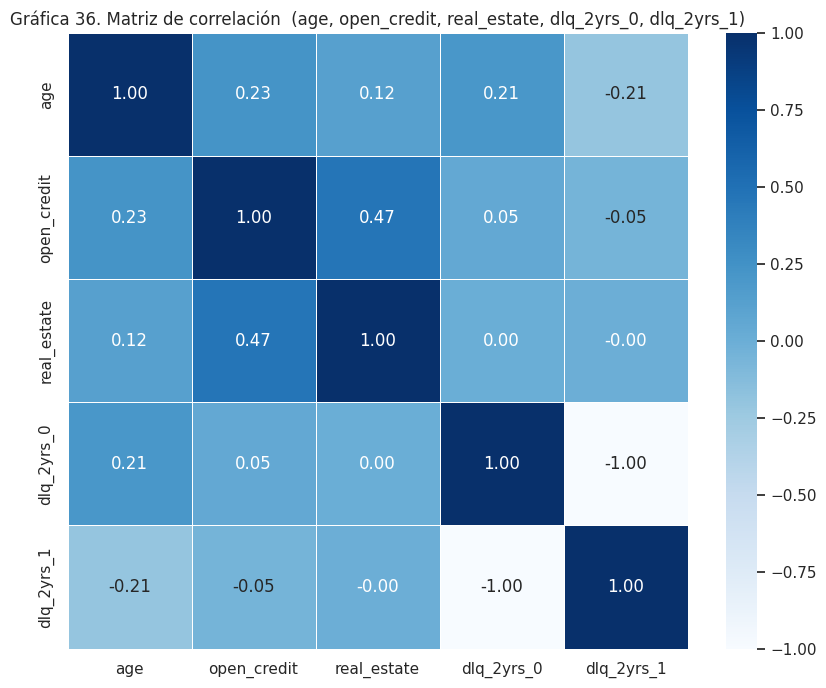

In [59]:
# Variables (age, open_credit, real_estate y dlq_2yrs "dummies")
# El atributo (dlq_2yrs) se separa en 2 atributos nuevos (0 y 1)
data_dummies = pd.get_dummies(data['dlq_2yrs'], prefix='dlq_2yrs', drop_first=False)

# Se concatena del dataframe (data) con el nuevo dataframe (data_dummies)
data_dummies = pd.concat([data, data_dummies], axis=1)

# Variables a incluir en la correlación (age, open_credit, real_estate y las dummies de dlq_2yrs)
data_corr = data_dummies[["age", "open_credit", "real_estate", "dlq_2yrs_0", "dlq_2yrs_1"]]

# Calcula la matriz de correlación
correlation_matrix = data_corr.corr()

# Crea el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,         # Muestra los valores dentro de cada celda
    cmap="Blues",       # Escala de azules
    fmt=".2f",          # Formato de los números
    linewidths=0.5)     # Líneas divisorias entre celdas
plt.title("Gráfica 36. Matriz de correlación  (age, open_credit, real_estate, dlq_2yrs_0, dlq_2yrs_1)")
plt.show()

A la variable (dlq_2yrs) se le aplica el método (dummies) de (pandas) para crear 2 variables nuevas:
<br><br>
dlq_2yrs_0 (No ocurrió una delincuencia grave)<br>
dlq_2yrs_1 (Si ocurrió una delincuencia grave)
<br><br>
Entre los atributos que tuvieron una distribución normal o con valores típicos (age, open_credit y real_estate) los porcentajes de correlación en forma descendente son los siguientes:
<br><br>
Atributos (open_credit y real_estate) con un (47%)<br>
Atributos (age y open_credit) con un (23%)<br>
Atributos (age y real_estate) con un (12%)
<br><br>
Y entre estos atributos el porcentaje (<u>en valor absoluto</u>) de correlación en forma descendente con las 2 variables nuevas (dlq_2yrs_0 y dlq_2yrs_1) es:
<br><br>
Atributos (dlq_2yrs_0 y age) con un (21%)<br>
Atributos (dlq_2yrs_0 y open_credit) con un (5%)<br>
Atributos (dlq_2yrs_0 y real_estate) con un (0%)
<br><br>
Atributos (dlq_2yrs_1 y age) con un (-21%)<br>
Atributos (dlq_2yrs_1 y open_credit) con un (-5%)<br>
Atributos (dlq_2yrs_1 y real_estate) con un (0%)
<br><br>
Nota:
La variable (age) es la que tiene un mayor porcentaje de correlación (<u>en valor absoluto</u>) con las 2 variables nuevas (dlq_2yrs_0 y dlq_2yrs_1) de (21%).

**8.2.2 Matriz de correlación entre las variables (rev_util, debt_ratio, monthly_inc, dependents, late_30_59, late_60_89, late_90, dlq_2yrs_0 y dlq_2yrs_1)**


---



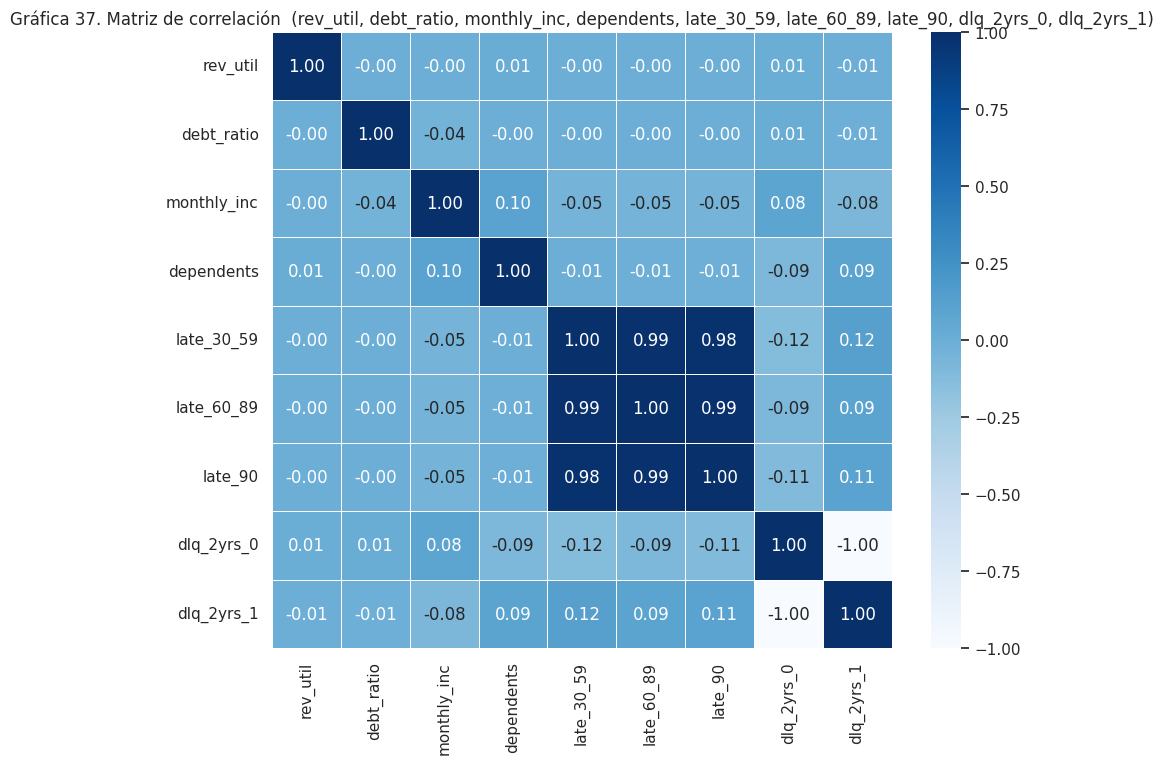

In [60]:
# Variables a incluir en la correlación (age, open_credit, real_estate y las dummies de dlq_2yrs)
data_corr = data_dummies[["rev_util", "debt_ratio", "monthly_inc", "dependents", "late_30_59", "late_60_89", "late_90", "dlq_2yrs_0", "dlq_2yrs_1"]]

# Calcula la matriz de correlación
correlation_matrix = data_corr.corr()

# Crea el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,         # Muestra los valores dentro de cada celda
    cmap="Blues",       # Escala de azules
    fmt=".2f",          # Formato de los números
    linewidths=0.5)     # Líneas divisorias entre celdas
plt.title("Gráfica 37. Matriz de correlación  (rev_util, debt_ratio, monthly_inc, dependents, late_30_59, late_60_89, late_90, dlq_2yrs_0, dlq_2yrs_1)")
plt.show()

Entre los atributos que tuvieron una distribución con valores atípicos (rev_util, debt_ratio, monthly_inc, dependents, late_30_59, late_60_89 y late_90) los porcentajes de correlación en forma descendente son los siguientes:
<br><br>
Atributos (late_30_59 y late_60_89) con un (99%)<br>
Atributos (late_60_89 y late_90) con un (99%)<br>
Atributos (late_30_59 y late_90) con un (98%)<br>
Atributos (monthly_inc y dependents) con un (10%)
<br><br>
Y entre estos atributos el porcentaje (<u>en valor absoluto</u>) de correlación en forma descendente con las 2 variables nuevas (dlq_2yrs_0 y dlq_2yrs_1) es:
<br><br>
Atributos (dlq_2yrs_0 y late_30_59) con un (-12%)<br>
Atributos (dlq_2yrs_0 y late_90) con un (-11%)<br>
Atributos (dlq_2yrs_0 y late_60_89) con un (-9%)<br>
Atributos (dlq_2yrs_0 y dependents) con un (-9%)<br>
Atributos (dlq_2yrs_0 y monthly_inc) con un (8%)
<br><br>
Atributos (dlq_2yrs_1 y late_30_59) con un (12%)<br>
Atributos (dlq_2yrs_1 y late_90) con un (11%)<br>
Atributos (dlq_2yrs_1 y late_60_89) con un (9%)<br>
Atributos (dlq_2yrs_1 y dependents) con un (9%)<br>
Atributos (dlq_2yrs_1 y monthly_inc) con un (-8%)<br>
<br><br>
Nota:
La variable (late_30_59) es la que tiene un mayor porcentaje de correlación (<u>en valor absoluto</u>) con las 2 variables nuevas (dlq_2yrs_0 y dlq_2yrs_1) de (12%).

**8.3 Gráfica PairPlot.**


---



<b>8.3.1 Gráfica PairPLot General

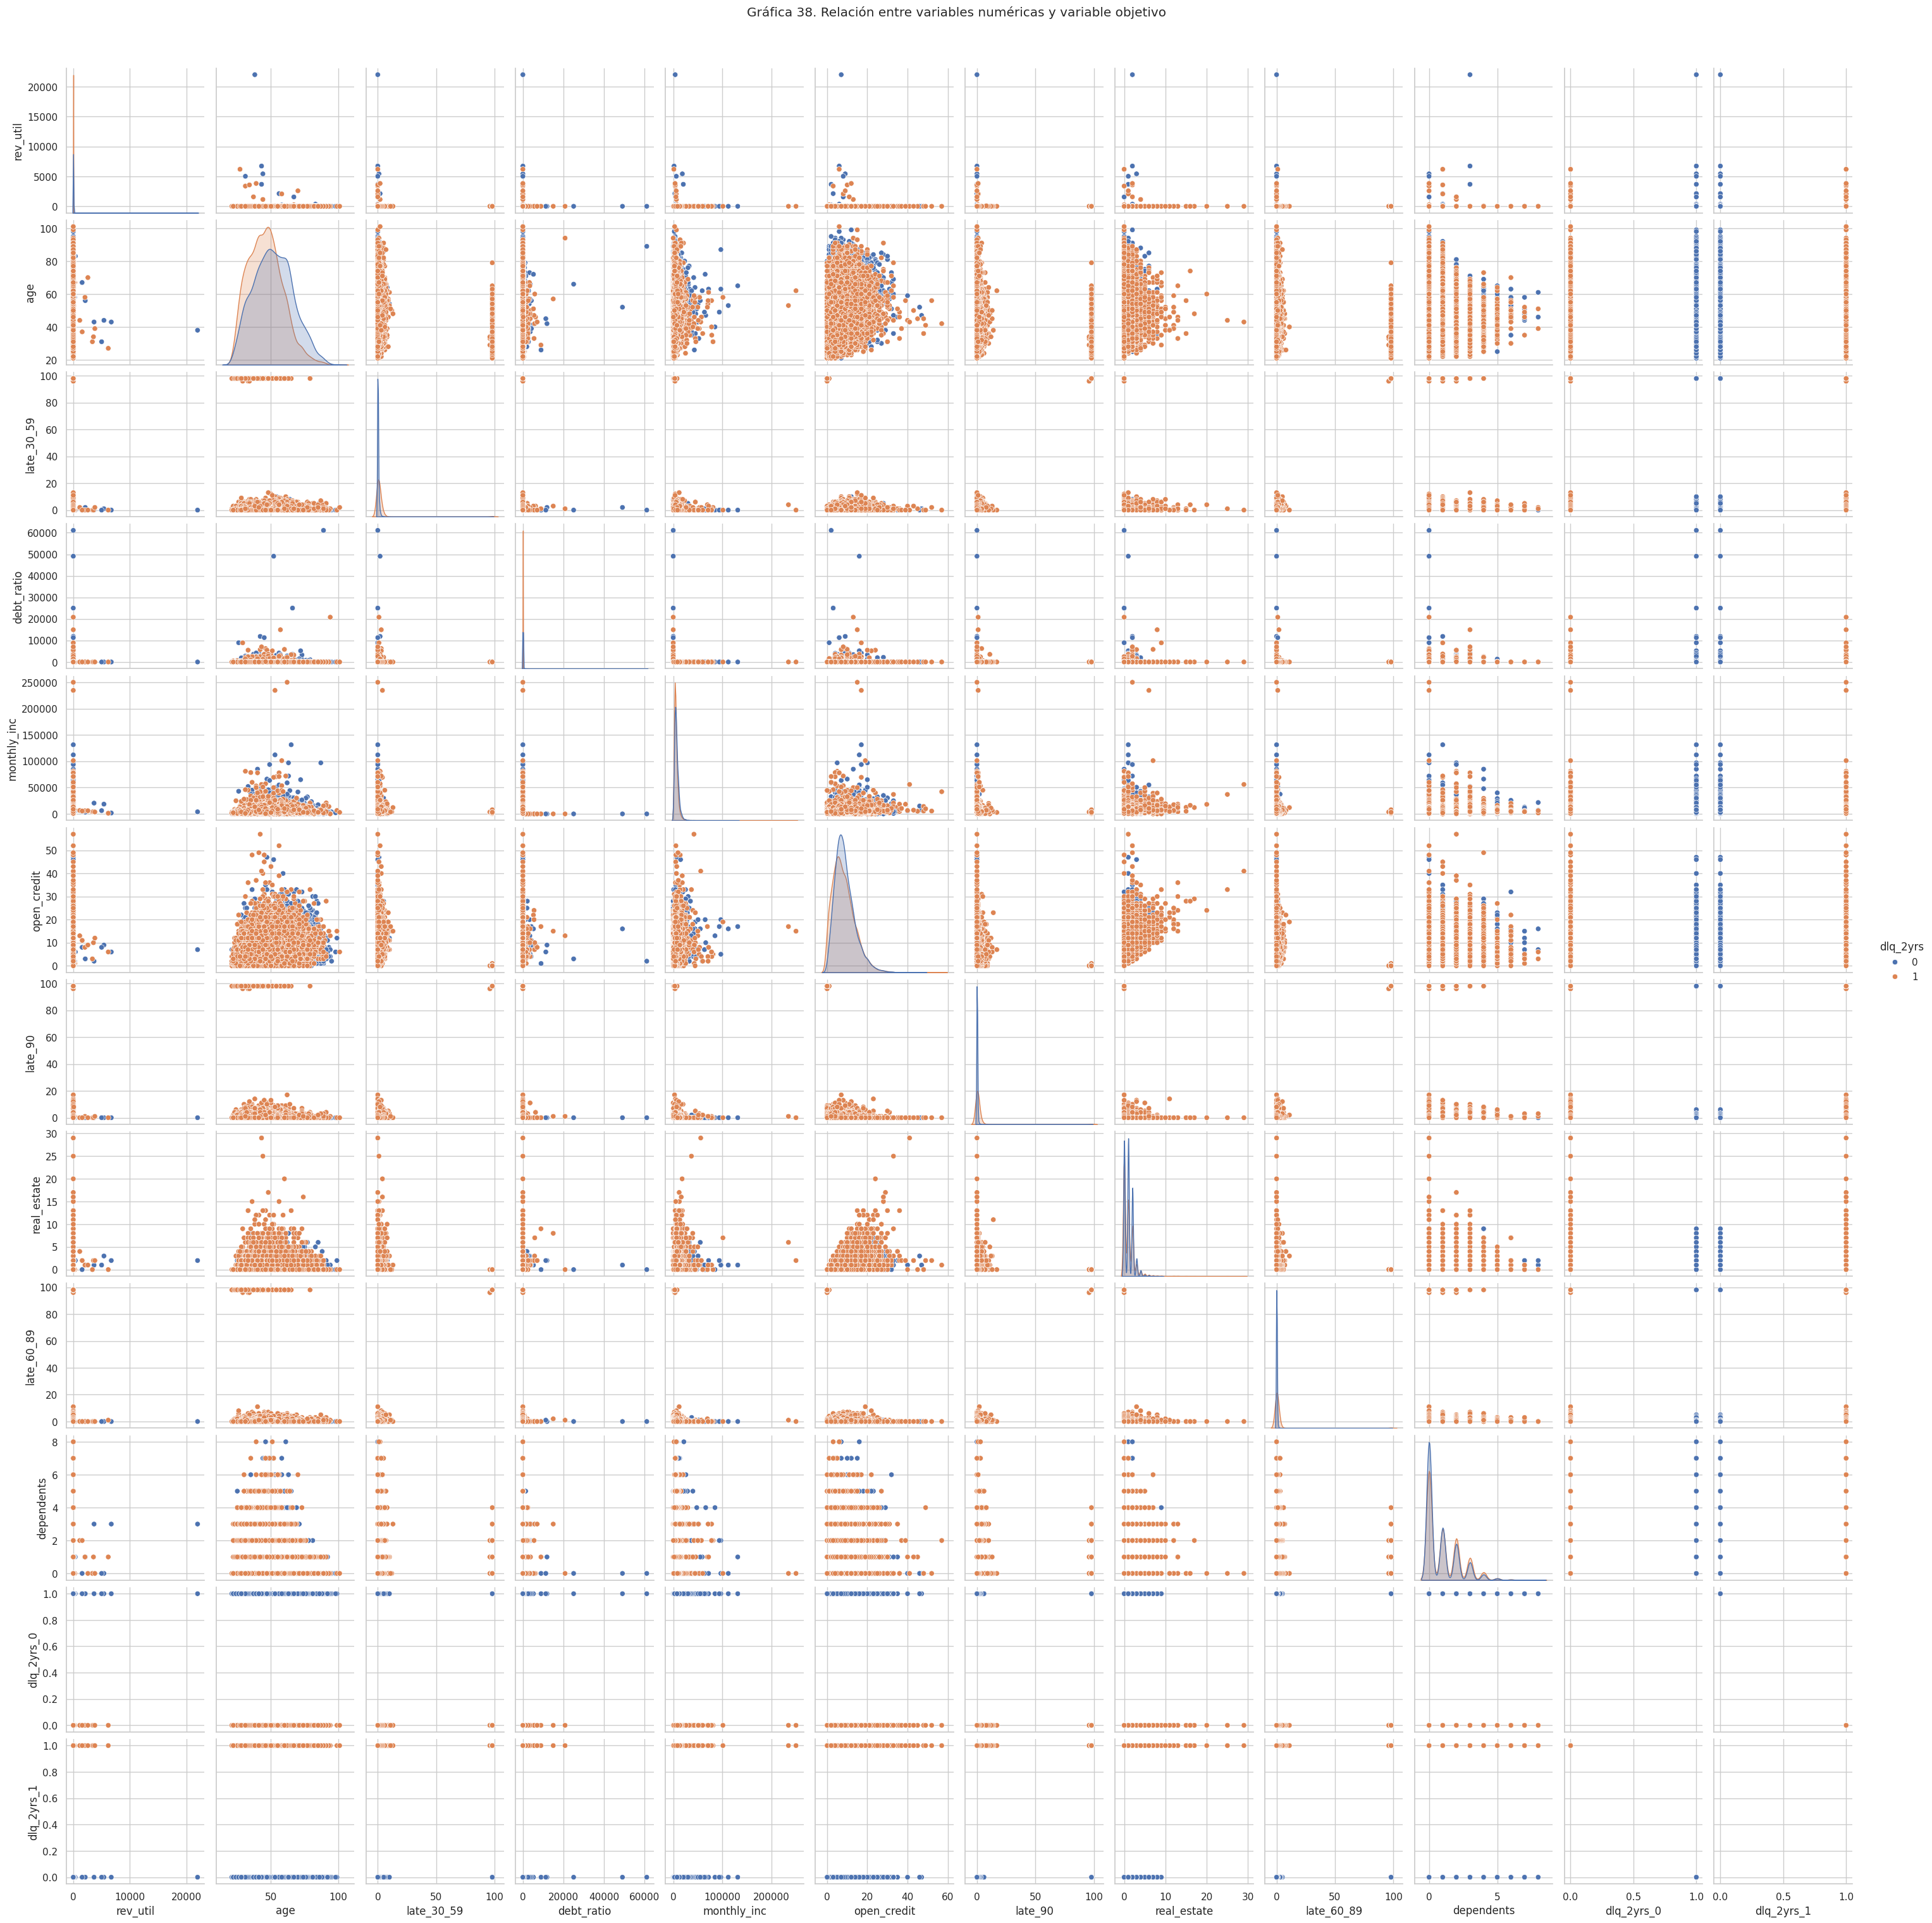

In [61]:
sns.pairplot(data_dummies, hue='dlq_2yrs')
plt.suptitle('Gráfica 38. Relación entre variables numéricas y variable objetivo', y=1.02)
plt.show()

Tanto en el análisis univariado como en el gráfico 38, se evidencia que los atributos rev_util y debt_ratio tiene valores extremos atípicos que pueden distorsionar el análisis el modelo; teniendo en cuenta que estos atributos desde el punto de vista de análisis crediticio generalmente no deben valores superiores 100%, es necesario realizar una depuración de estos datos.

<b>8.3.2 Gráfica PairPLot General con Depuración de Datos

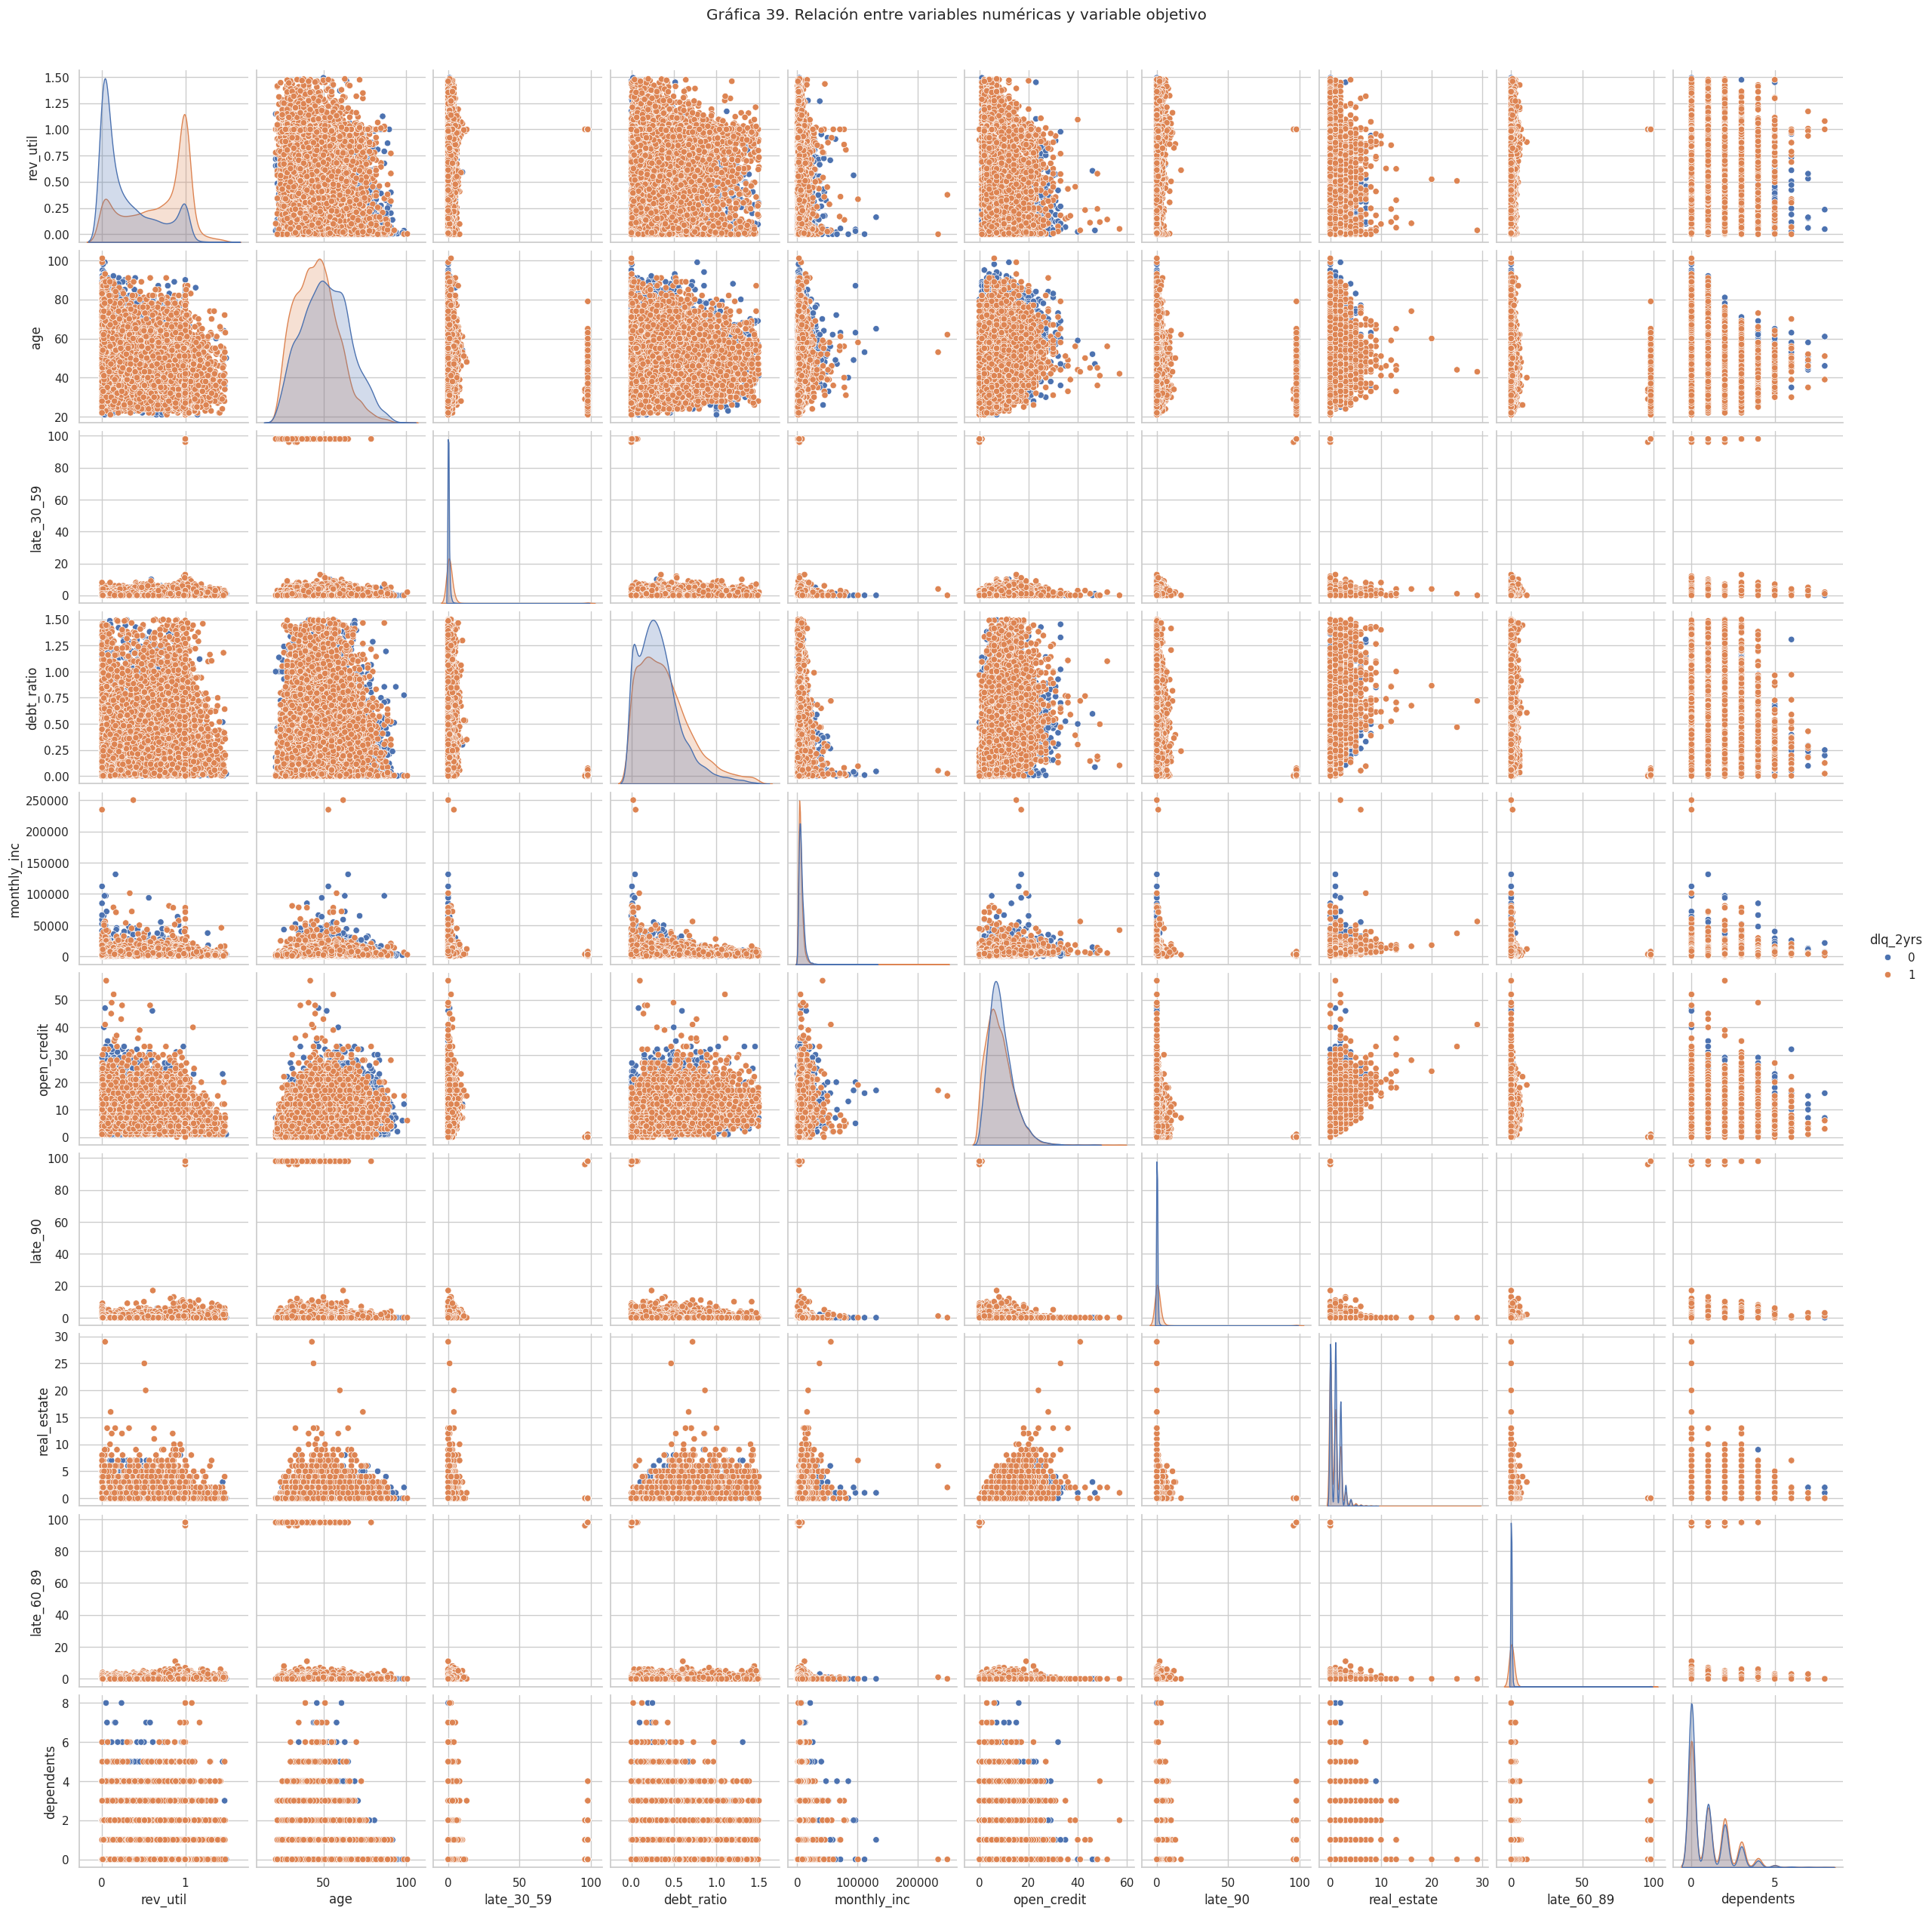

In [62]:
# Filtrar filas donde 'rev_util' es mayor a 100
umbral_rev= 1.5
df_dummies= data[(data_dummies['rev_util'] <= umbral_rev) & (data_dummies['debt_ratio'] <= umbral_rev)]
info_vars = []
for col in data.columns:
    info_vars.append({
        'Variable': col,
        'Tipo de Dato': str(df_dummies[col].dtype),
        'Naturaleza': tipo_de_variable(df_dummies[col]),
        'Valores Únicos': df_dummies[col].nunique()
    })
sns.pairplot(df_dummies, hue='dlq_2yrs')
plt.suptitle('Gráfica 39. Relación entre variables numéricas y variable objetivo', y=1.02)
plt.show()

En la gráfica 39 se evidencia una mejora en la distribución de los datos sobre todo en donde se relaciona los atributos rev_util y debt_ratio.

<b>8.3.3 Gráfica PairPLot entre las variables (open_credit, real_estate, dlq_2yrs_0 y dlq_2yrs_1) según (age_ranges)</b>

In [63]:
age_ranges = {
    48: 'Entre 0 y 48 años',
    float('inf'): 'Mayor a 48 años'
}

# Extraer los bins (puntos de corte) y labels (etiquetas) del diccionario
# Asegúrate de incluir el límite inferior del primer bin
bins = [0] + list(age_ranges.keys())
labels = list(age_ranges.values())

# Crear la nueva columna 'age_range' usando pd.cut
# include_lowest=True es importante para incluir el 0 en el primer bin
df_dummies['age_range'] = pd.cut(df_dummies['age'], bins=bins, labels=labels, right=True, include_lowest=True)

# Mostrar las primeras filas del DataFrame con la nueva columna
#print(df_dummies.head())

# Opcional: Ver la distribución de la nueva columna categórica
print("\nDistribución de age_range:")
print(df_dummies['age_range'].value_counts())


Distribución de age_range:
age_range
Entre 0 y 48 años    8155
Mayor a 48 años      7804
Name: count, dtype: int64


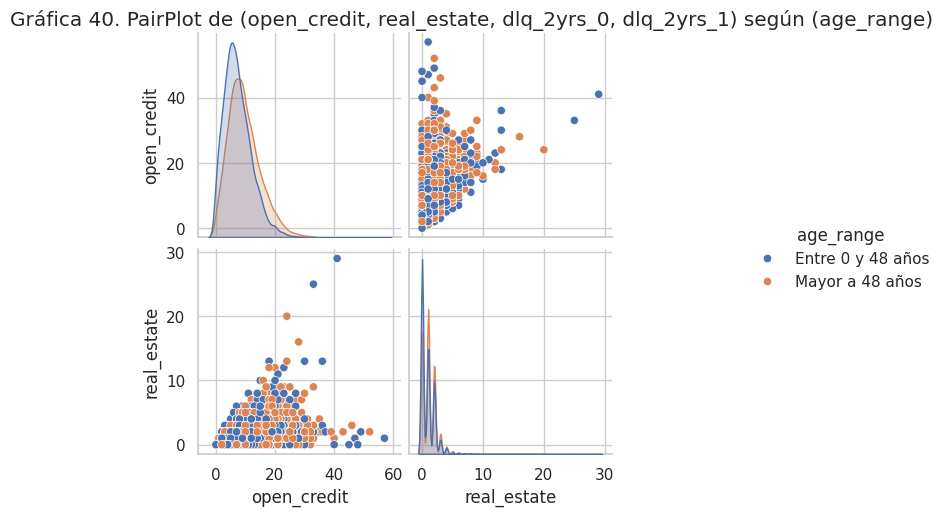

In [64]:
# prompt:  Pairplot de (open_credit, real_estate, dlq_2yrs_0, dlq_2yrs_1) según (age_range)

import matplotlib.pyplot as plt
# Variables a incluir en el PairPlot
variables_pairplot = ["open_credit", "real_estate", "dlq_2yrs_0", "dlq_2yrs_1"]

# Asegurarse de que las variables existen en el DataFrame filtrado
available_vars = [var for var in variables_pairplot if var in df_dummies.columns]

if not available_vars:
    print("Ninguna de las variables especificadas está presente en el DataFrame.")
else:
    # Crear el PairPlot
    sns.pairplot(df_dummies, vars=available_vars, hue='age_range', diag_kind='kde')
    plt.suptitle('Gráfica 40. PairPlot de (open_credit, real_estate, dlq_2yrs_0, dlq_2yrs_1) según (age_range)', y=1.02)
    plt.show()


In [65]:
# Extraer los bins (puntos de corte) y labels (etiquetas) del diccionario
# Asegúrate de incluir el límite inferior del primer bin
bins = [0] + list(age_ranges.keys())
labels = list(age_ranges.values())

# Crear la nueva columna 'age_range' using pd.cut
# Add the 'age_range' column to data_dummies instead of df_dummies
data_dummies['age_range'] = pd.cut(data_dummies['age'], bins=bins, labels=labels, right=True, include_lowest=True)

# Mostrar las primeras filas del DataFrame con la nueva columna
#print(data_dummies.head())

# Opcional: Ver la distribución de la nueva columna categórica
print("\nDistribución de age_range:")
print(data_dummies['age_range'].value_counts())

# Now, the crosstab should work correctly using data_dummies
contingencia = pd.crosstab(data_dummies['age_range'], data_dummies['dlq_2yrs'])
contingencia = contingencia[[0, 1]]  # asegurar orden
contingencia['(Porcentaje)'] = (contingencia[1] / (contingencia.sum(axis=1)) * 100).round(1)

print(contingencia)


Distribución de age_range:
age_range
Entre 0 y 48 años    8553
Mayor a 48 años      8161
Name: count, dtype: int64
dlq_2yrs              0     1  (Porcentaje)
age_range                                  
Entre 0 y 48 años  3579  4974          58.2
Mayor a 48 años    4778  3383          41.5


Debido a que el atributo (age) es el que más se acerca a una distribución normal y el que mayor porcentaje de correlación (en valor absoluto) tiene con las 2 variables nuevas (dlq_2yrs_0 y dlq_2yrs_1), se optó por clasificarlo en 2 grupos equitativamente (Entre 0 y 48 años, y Mayor a 48 años) en una nueva variable llamada (age_range).  Lo anterior, con el fin de utilizarlo en un gráfico (Pairplot).
<br><br>
Se observa que el atributo (age_range) para el grupo (Entre 0 y 48 años) tiene una mayor tendencia (58.2%) hacia el grupo (1) del atributo (dlq_2yrs); esto quiere decir, que las personas en este rango de edad tienen una mayor tendencia a presentar una delincuencia grave.
<br>
Las personas en el grupo (Mayor a 48 años) tienen una menor tendencia (41.5) a presentar una delincuencia grave.



**8.4 Análisis de Distribución de Densidad Bivariado de Atributos**


---


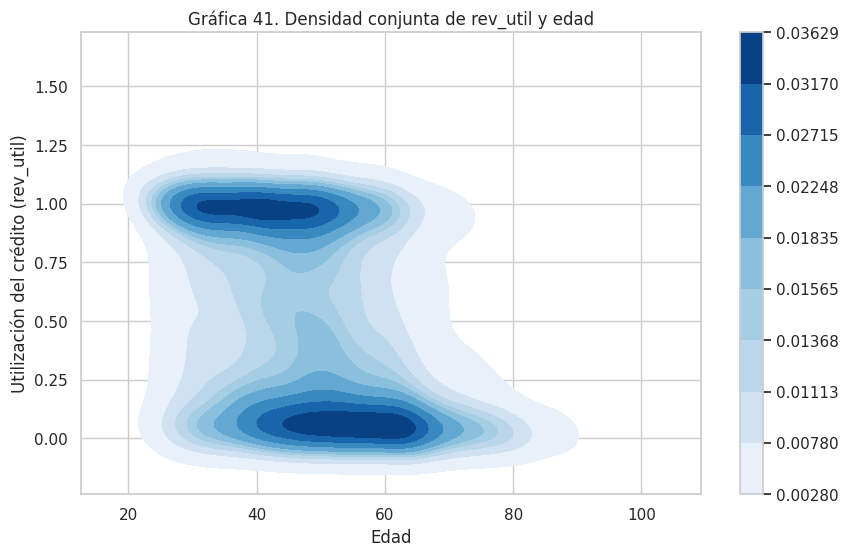

In [66]:
import matplotlib.pyplot as plt
# Filtrar datos sin valores nulos en 'rev_util' y 'age'
df_dummies_clean = df_dummies.dropna(subset=['rev_util', 'age'])

# Crear el gráfico de densidad bivariado con barra de colores
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_dummies_clean, x='age', y='rev_util', fill=True, cmap='Blues', thresh=0.05, cbar=True)

# Agregar título y etiquetas
plt.title('Gráfica 41. Densidad conjunta de rev_util y edad')
plt.xlabel('Edad')
plt.ylabel('Utilización del crédito (rev_util)')

# Mostrar el gráfico
plt.show()

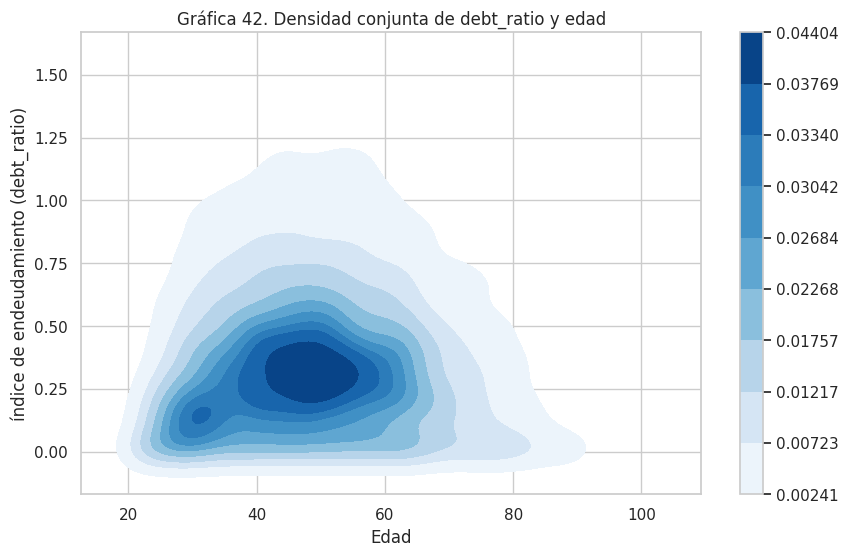

In [67]:
import matplotlib.pyplot as plt
# Filtrar datos sin valores nulos en 'debt_ratio' y 'age'
df_dummies_clean = df_dummies.dropna(subset=['debt_ratio', 'age'])

# Crear el gráfico de densidad bivariado con barra de colores
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_dummies_clean, x='age', y='debt_ratio', fill=True, cmap='Blues', thresh=0.05, cbar=True)

# Agregar título y etiquetas
plt.title('Gráfica 42. Densidad conjunta de debt_ratio y edad')
plt.xlabel('Edad')
plt.ylabel('índice de endeudamiento (debt_ratio)')

# Mostrar el gráfico
plt.show()

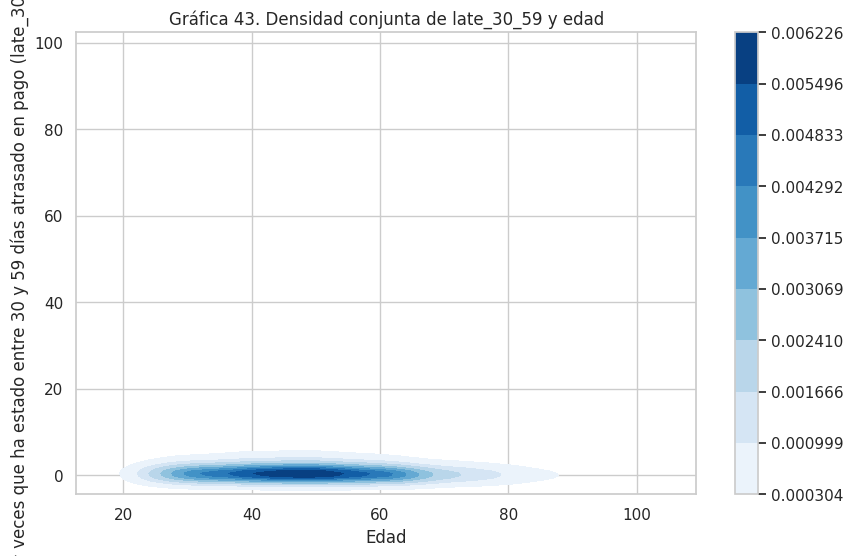

In [68]:
# Filtrar datos sin valores nulos en 'late_30_59' y 'age'
df_dummies_clean = df_dummies.dropna(subset=['late_30_59', 'age'])

# Crear el gráfico de densidad bivariado con barra de colores
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_dummies_clean, x='age', y='late_30_59', fill=True, cmap='Blues', thresh=0.05, cbar=True)

# Agregar título y etiquetas
plt.title('Gráfica 43. Densidad conjunta de late_30_59 y edad')
plt.xlabel('Edad')
plt.ylabel('# veces que ha estado entre 30 y 59 días atrasado en pago (late_30_59)')

# Mostrar el gráfico
plt.show()

**8.5 Observaciones de la  exploración de datos multivariado**


---



- Los atributos (age, open_credit y real_estate) tienen una distribución normal o simétrica, lo cual indica que su (media y mediana) son aproximadamente iguales, y las diferencias entre la (media y la mediana) con los rangos (mínimos y máximos) no son tan extremas.  
- Los atributos (rev_util, debt_ratio, monthly_inc, dependents, late_30_59, late_60_89, late_90) tienen una distribución sesgada o con valores atípicos extremos.
- El atributo (age) es el que más se acerca a una districución normal con una media de (48.80) y una mediana de (48.0); su valor mínimo es de (21 años) y el máximo de (101 años) lo cual indica que no son tan extremos con respecto a la media y la mediana.
- El atributo (open_credit) tiene una media de (8.50) y una mediana de (8.0) que también son relativamente cercanas y podría tener una distribución simétrica; sin embargo, la presencia de valores atípicos en este caso, podría influir en la distribución.
- El atributo (real_estate) tiene una media de (1.05) y una mediana de (1.0); esto indica que gran parte de sus datos se agrupan al rededor de (1); pero al observar su histograma se encuentra que la presencia de valores atípicos, podría influir en la distribución.
- En los atributos (rev_util, debt_ratio, monthly_inc) la media es considerablemente mayor a la mediana, indicando un fuerte sesgo positivo, donde hay valores extremos altos que arrastran la media hacia arriba.  En el atributo (rev_util) su (media) es de (4.80) y su (mediana) es de (0.44); el (valor máximo) de (22000) arrastra la media hacia arriba. En el atributo (debt_ratio) su (media) es de (30.98) y su (mediana) es de (0.32); el (valor máximo) de (61106.5) arrastra la media hacia arriba.  En el atributo (monthly_inc) su (media) es de (6118.12) y su (mediana) es de (5000); el (valor máximo) de (250000) arrastra la media hacia arriba.
- En los atributos (dependents, late_30_59, late_60_89, late_90) la media es mayor que la mediana, la cual es (Cero) en los 4 casos; lo cual indica un sesgo fuertemente positivo, con una gran concentración de valores en (Cero) y algunos valores atípicos altos.
- Entre los atributos que tuvieron una distribución normal o con valores típicos (age, open_credit y real_estate) los porcentajes de correlación en forma descendente son (open_credit y real_estate) con un (47%), (age y open_credit) con un (23%) y (age y real_estate) con un (12%).  
- A la variable (dlq_2yrs) se le aplica el método (dummies) de (pandas) para crear 2 variables nuevas:  dlq_2yrs_0 (No ocurrió una delincuencia grave), y dlq_2yrs_1 (Si ocurrió una delincuencia grave); entre los atributos (age, open_credit y real_estate) el porcentaje (en valor absoluto) de correlación en forma descendente con las 2 variables nuevas (dlq_2yrs_0 y dlq_2yrs_1) es (dlq_2yrs_0 y age) con un (21%), (dlq_2yrs_0 y open_credit) con un (5%) y (dlq_2yrs_0 y real_estate) con un (0%).  La variable (age) es la que tiene un mayor porcentaje de correlación (en valor absoluto) con las 2 variables nuevas (dlq_2yrs_0 y dlq_2yrs_1) de (21%).
- Entre los atributos que tuvieron una distribución con valores atípicos (rev_util, debt_ratio, monthly_inc, dependents, late_30_59, late_60_89 y late_90) los porcentajes de correlación en forma descendente son los siguientes: (late_30_59 y late_60_89) con un (99%), (late_60_89 y late_90) con un (99%), (late_30_59 y late_90) con un (98%) y (monthly_inc y dependents) con un (10%).
- Entre los atributos (rev_util, debt_ratio, monthly_inc, dependents, late_30_59, late_60_89 y late_90) el porcentaje (en valor absoluto) de correlación en forma descendente con las 2 variables nuevas (dlq_2yrs_0 y dlq_2yrs_1) es (dlq_2yrs_0 y late_30_59) con un (12%), (dlq_2yrs_0 y late_90) con un (11%), (dlq_2yrs_0 y late_60_89) con un (9%), (dlq_2yrs_0 y dependents) con un (9%) y (dlq_2yrs_0 y monthly_inc) con un (8%).
- La variable (late_30_59) es la que tiene un mayor porcentaje de correlación (en valor absoluto) con las 2 variables nuevas (dlq_2yrs_0 y dlq_2yrs_1) de (12%).
- El grupo comprendido entre las edades de (0 y 48 años) tiene una mayor tendencia (58.2%) hacia el grupo (1) del atributo (dlq_2yrs); esto quiere decir, que las personas en este rango de edad tienen una mayor tendencia a presentar una delincuencia grave.
Las personas en el grupo (Mayor a 48 años) tienen una menor tendencia (41.5) a presentar una delincuencia grave.

- Algunos estudios sugieren que mantener una tasa de utilización (rev_util) entre el 10% y el 20% puede ser aún más beneficioso para el puntaje crediticio (Grant, 2025); teniendo en cuenta esto, para este dataset se observa del gráfico 41 que las personas con un rango de edad de 45 a 65 años pueden tener una mejor probabilidad de puntaje crediticio.

- Aunque los valores ideales pueden variar según las políticas de cada prestamista, se asume que un valor de debt_ratio menor a 0.36 (36%) es considerado un nivel de endeudamiento manejable y saludable; teniendo en cuenta esto, para este dataset se observa del gráfico 42 que las personas con un rango de edad de 45 a 55 años pueden tener una mejor probabilidad de puntaje crediticio ya que la mayoría tiene una probabilidad de tener un debt_ratio menor al 35%.

- El gráfico 43 evidencia que de la edad no es tan determinante para que exista una gran probabilidad que las personas tengan un mayor número de veces con retrasos de pago de 30 a 59 días. Se observa que independientemente de la edad el número de veces que se superan retrasos de pago de 30 a 59 días, está por debajo de 5 veces. Para este caso no es viable eliminar datos de numeros de veces mayores a 20 con retraso de pago de 30 a 59 días porque es una información real, probable e importante.

## **9. Planteamiento del problema**

**9.1 Definición del problema**


---



¿Podemos predecir si un cliente caerá en morosidad grave en los próximos 2 años (variable dlq_2yrs) a partir de sus características crediticias?

El dataset contiene información sobre prestatarios y su comportamiento crediticio. La variable objetivo (dlq_2yrs) indica si un prestatario incurre en una delincuencia grave en los próximos 2 años (0 = No, 1 = Sí). Esto sugiere que el problema es de clasificación binaria , ya que queremos predecir si un prestatario caerá en delincuencia o no.

**9.2 Justificación del modelo**


---



Tipo de modelo: clasificación (porque la variable objetivo es binaria: 0 o 1).

Modelo: Regresión logística.

Dado que la variable objetivo es binaria, un modelo de regresión logística es apropiado como punto de partida. La regresión logística permite modelar la probabilidad de que ocurra un evento binario (en este caso, morosidad). Es interpretable, eficaz y adecuada cuando se quiere evaluar la influencia de múltiples variables independientes sobre un resultado categórico. También podemos explorar otros modelos de clasificación, como árboles de decisión o bosques aleatorios, pero comenzaremos con regresión logística por su simplicidad y capacidad interpretativa, según (Hastie,2009), en el capítulo 4, titulado "Linear Methods for Classification" , los autores discuten la regresión logística como un método fundamental para problemas de clasificación binaria. Explican su simplicidad, interpretación directa de los coeficientes y su uso como punto de partida en muchos problemas prácticos. Además, en los capítulos posteriores (como el capítulo 9 sobre árboles de decisión y bosques aleatorios), se exploran alternativas más complejas pero potencialmente más poderosas para problemas de clasificación.

## **10. Preprocesamiento y selección de atributos del modelo**

-------

Para comenzar definimos las variables y datos necesarios para el modelo predictorio:

**10.1 All in**


---
Partimos de tomar todas las variables y validar el p valor

In [69]:
import statsmodels.api as sm
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 1. Definir columnas
X_cols = list(set(data.columns) - set(['dlq_2yrs']))
y_col = 'dlq_2yrs'

# 2. Crear DataFrames separados
X = data[X_cols]
y = data[y_col]

# 3. Separar en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# 4. Escalar datos
sc_x = StandardScaler().fit(X_train)
sc_y = StandardScaler().fit(y_train.values.reshape(-1, 1))

X_train_scaled = pd.DataFrame(sc_x.transform(X_train), columns=X_cols)
y_train_scaled = pd.Series(sc_y.transform(y_train.values.reshape(-1, 1)).flatten(), name=y_col)

# 5. Agregar constante para intercepto
X_train_scaled_const = sm.add_constant(X_train_scaled)

# 6. Ajustar modelo con statsmodels
model_sm = sm.OLS(y_train_scaled, X_train_scaled_const).fit()

# 7. Mostrar resumen con nombres de columnas
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:               dlq_2yrs   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     137.6
Date:                Sat, 31 May 2025   Prob (F-statistic):          1.96e-274
Time:                        14:49:29   Log-Likelihood:                -17133.
No. Observations:               12535   AIC:                         3.429e+04
Df Residuals:                   12524   BIC:                         3.437e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        8.401e-17      0.008    9.9e-15      

**10.2 Backward elimination**


---
Partiendo del All in, se inicia a eliminar del modelo las variables con p valor mayor a 0.05. Por lo cual se inicia con open_credit.

In [70]:
# 1. Definir columnas
X_cols = list(set(data.columns) - set(['dlq_2yrs','open_credit']))
y_col = 'dlq_2yrs'

# 2. Crear DataFrames separados
X = data[X_cols]
y = data[y_col]

# 3. Separar en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# 4. Escalar datos
sc_x = StandardScaler().fit(X_train)
sc_y = StandardScaler().fit(y_train.values.reshape(-1, 1))

X_train_scaled = pd.DataFrame(sc_x.transform(X_train), columns=X_cols)
y_train_scaled = pd.Series(sc_y.transform(y_train.values.reshape(-1, 1)).flatten(), name=y_col)

# 5. Agregar constante para intercepto
X_train_scaled_const = sm.add_constant(X_train_scaled)

# 6. Ajustar modelo con statsmodels
model_sm = sm.OLS(y_train_scaled, X_train_scaled_const).fit()

# 7. Mostrar resumen con nombres de columnas
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:               dlq_2yrs   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     152.8
Date:                Sat, 31 May 2025   Prob (F-statistic):          2.45e-275
Time:                        14:49:29   Log-Likelihood:                -17134.
No. Observations:               12535   AIC:                         3.429e+04
Df Residuals:                   12525   BIC:                         3.436e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        8.401e-17      0.008    9.9e-15      

Posteriormente se elimina rev_util

In [71]:
# 1. Definir columnas
X_cols = list(set(data.columns) - set(['dlq_2yrs','open_credit','rev_util']))
y_col = 'dlq_2yrs'

# 2. Crear DataFrames separados
X = data[X_cols]
y = data[y_col]

# 3. Separar en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# 4. Escalar datos
sc_x = StandardScaler().fit(X_train)
sc_y = StandardScaler().fit(y_train.values.reshape(-1, 1))

X_train_scaled = pd.DataFrame(sc_x.transform(X_train), columns=X_cols)
y_train_scaled = pd.Series(sc_y.transform(y_train.values.reshape(-1, 1)).flatten(), name=y_col)

# 5. Agregar constante para intercepto
X_train_scaled_const = sm.add_constant(X_train_scaled)

# 6. Ajustar modelo con statsmodels
model_sm = sm.OLS(y_train_scaled, X_train_scaled_const).fit()

# 7. Mostrar resumen con nombres de columnas
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:               dlq_2yrs   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     171.7
Date:                Sat, 31 May 2025   Prob (F-statistic):          3.83e-276
Time:                        14:49:30   Log-Likelihood:                -17134.
No. Observations:               12535   AIC:                         3.429e+04
Df Residuals:                   12526   BIC:                         3.435e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        8.401e-17      0.008    9.9e-15      

Teniendo en cuenta que ya todas la variables tienen un p valor menor que 0.05, se finaliza la selección de variables.

In [83]:
# atributos mas importantes para el modelo
# Lista de atributos seleccionados para el modelo inicial
atributos_seleccionados = [
    'late_30_59',
    'late_90',
    'late_60_89',
    'age',
    'real_estate',
    'debt_ratio',
    'dependents',
    'monthly_inc'
]

print("Atributos seleccionados para el modelo:")
print(atributos_seleccionados)

# La variable objetivo es 'dlq_2yrs'
variable_objetivo = 'dlq_2yrs'
print("\nVariable objetivo:")
variable_objetivo

Atributos seleccionados para el modelo:
['late_30_59', 'late_90', 'late_60_89', 'age', 'real_estate', 'debt_ratio', 'dependents', 'monthly_inc']

Variable objetivo:


'dlq_2yrs'

**10.1 Observaciones del preprocesamiento y selección de atributos**


---

Basado en el proceso de selección de variables Backward elimination y en el análisis exploratorio, los atributos más relevantes para el modelo de predicción de morosidad crediticia grave (dlq_2yrs) son:

* late_30_59 (Número de veces que se ha vencido entre 30 y 59 días)
* late_90 (Número de veces que se ha retrasado 90 días o más un pago)
* late_60_89 (Número de veces que se ha vencido entre 60 y 89 días)
* age (Edad del prestatario)
* real_estate (Número de préstamos inmobiliarios o líneas de crédito)
* debt_ratio (Ratio deuda-ingresos)
* dependents (Número de dependientes)
* monthly_inc (Ingresos mensuales) - Aunque con menor correlación, es conceptualmente importante.



## 11. Selección de Hiperparámetros

In [118]:
# ========== 1. IMPORTAR PAQUETES ==========
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    classification_report, confusion_matrix, f1_score, ConfusionMatrixDisplay
)
import statsmodels.api as sm
import matplotlib.pyplot as plt

# ========== 2. CARGAR Y PREPARAR LOS DATOS ==========
X = data[atributos_seleccionados]
y = data[variable_objetivo]

# ========== 3. DIVIDIR Y ESCALAR ==========
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelo base sin ajustes (usa valores por defecto)
modelo_base = LogisticRegression(solver='liblinear')  # mismo solver por compatibilidad
modelo_base.fit(X_train_scaled, y_train)

# Predicción con el modelo base
y_pred_base = modelo_base.predict(X_test_scaled)

# F1-score del modelo base
f1_base = f1_score(y_test, y_pred_base)
print("📉 F1-Score del modelo SIN ajustar:", round(f1_base, 4))

📉 F1-Score del modelo SIN ajustar: 0.6892


In [114]:
# ===== 4. CONFIGURAR GRIDSEARCHCV PARA BUSCAR HIPERPARÁMETROS ÓPTIMOS =====
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'class_weight': [None, 'balanced'],
    'solver': ['liblinear']  # Necesario para soportar 'l1'
}

log_reg = LogisticRegression()
grid = GridSearchCV(log_reg, param_grid, scoring='f1', cv=5)
grid.fit(X_train_scaled, y_train)


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10],
                         'class_weight': [None, 'balanced'],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             scoring='f1')

In [115]:
# ===== 6. RESULTADOS DEL MEJOR MODELO =====
print("\n✅ Mejor combinación de hiperparámetros:")
print(grid.best_params_)

best_model = grid.best_estimator_


✅ Mejor combinación de hiperparámetros:
{'C': 10, 'class_weight': None, 'penalty': 'l2', 'solver': 'liblinear'}


El modelo rindió mejor sin ajustar pesos para clases desbalanceadas, es decir, el modelo logró un mejor F1-score promedio en validación cruzada sin necesidad de compensar el desbalance entre clases, esto es debido a que el dataset está balanceado como se indico en el EDA.

In [116]:
# ===== 7. PREDICCIONES Y MÉTRICAS EN TEST SET =====
y_pred = best_model.predict(X_test_scaled)

f1 = f1_score(y_test, y_pred)
print(f"\n🎯 F1-Score en test: {round(f1, 4)}")

print("\n📄 Classification Report:")
print(classification_report(y_test, y_pred))


🎯 F1-Score en test: 0.6907

📄 Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.81      0.75      2101
           1       0.77      0.63      0.69      2078

    accuracy                           0.72      4179
   macro avg       0.73      0.72      0.72      4179
weighted avg       0.73      0.72      0.72      4179



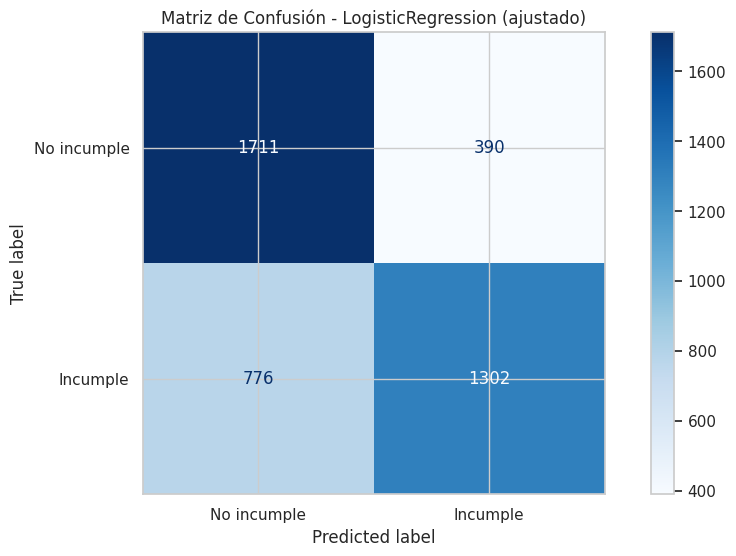

In [117]:
# ===== 8. MATRIZ DE CONFUSIÓN =====
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=['No incumple', 'Incumple'])
disp.plot(cmap='Blues')
plt.title("Matriz de Confusión - LogisticRegression (ajustado)")
plt.show()

In [120]:
if f1_ajustado > f1_base:
    print("\n✅ El modelo AJUSTADO tiene mejor F1-score.")
elif f1_ajustado < f1_base:
    print("\n⚠️ El modelo BASE tiene mejor F1-score.")
else:
    print("\n🔄 Ambos modelos tienen el mismo F1-score.")


✅ El modelo AJUSTADO tiene mejor F1-score.


### Primer modelo con p-valores

## **11. f1-score**


F1-Score del modelo de Regresión Logística: 0.6981

Importancia de los atributos (magnitud de los coeficientes de la Regresión Logística):
late_90        0.619622
late_30_59     0.579276
late_60_89     0.176996
real_estate    0.094091
dependents     0.082607
age            0.025832
debt_ratio     0.000067
monthly_inc    0.000027
dtype: float64


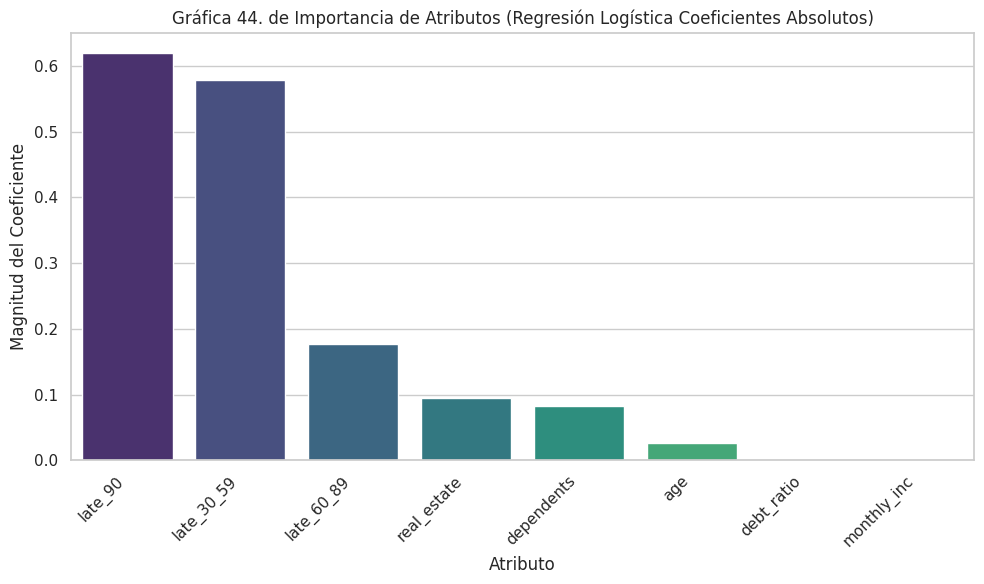


Visualizando la relación de los 3 atributos más importantes (['late_90', 'late_30_59', 'late_60_89']) con la variable objetivo:


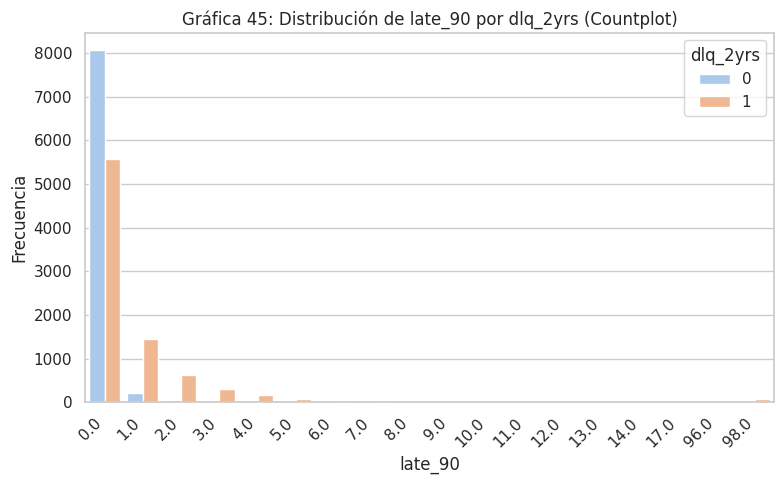

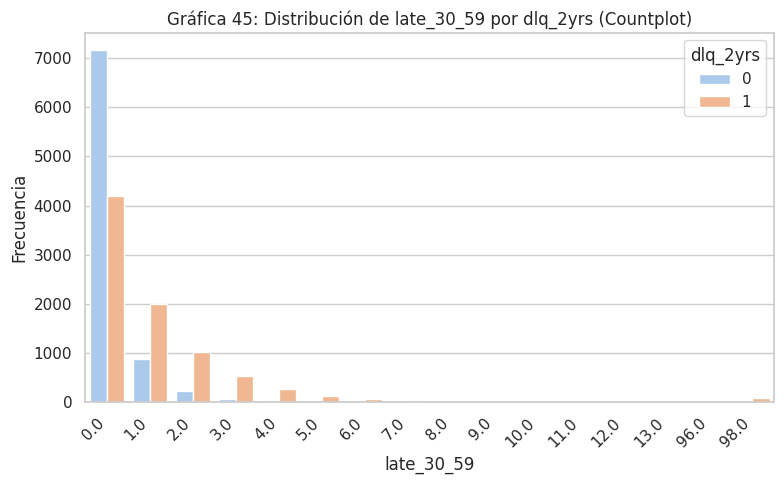

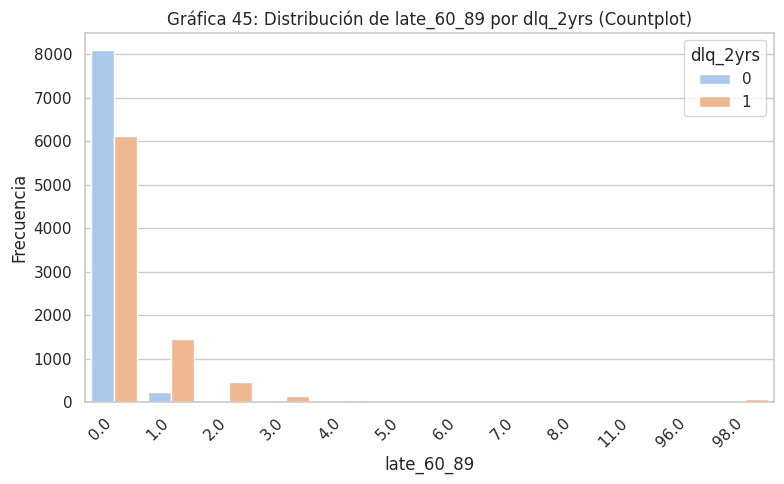

In [74]:
import pandas as pd
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Convertir columnas numéricas (excepto la categórica 'dlq_2yrs')
for col in data.columns:
    if col != 'dlq_2yrs':
        # Convertir a string primero para manejar posibles formatos
        data[col] = data[col].astype(str)
        # Eliminar caracteres no numéricos (%, ,) y convertir a numérico
        data[col] = data[col].str.replace('[%,]', '', regex=True).str.strip()
        data[col] = pd.to_numeric(data[col], errors='coerce')

# La variable objetivo es 'dlq_2yrs' (asegurarse de que sea numérica o esté codificada para el modelo)
# Si 'dlq_2yrs' es 'category' con 0 y 1, LogisticRegression lo manejará.
# Si fuera texto ('No', 'Sí'), necesitarías codificarlo.
# Según el código anterior, ya se convirtió a 'category' con 0 y 1.

# Definir características (X) y variable objetivo (y)
X = data[atributos_seleccionados]
y = data[variable_objetivo]

# Manejar valores nulos si los hay en las columnas seleccionadas (imputación simple con la media)
# Puedes elegir otra estrategia de imputación si lo prefieres
for col in atributos_seleccionados:
    if X[col].isnull().any():
        X[col] = X[col].fillna(X[col].mean())

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y) # Estratificar si la clase objetivo está desbalanceada

# Entrenar un modelo de Regresión Logística
model = LogisticRegression(solver='liblinear') # solver='liblinear' recomendado para datasets pequeños o medianos
model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular el F1-Score del modelo
f1 = f1_score(y_test, y_pred)
print(f"\nF1-Score del modelo de Regresión Logística: {f1:.4f}")

# Obtener los coeficientes del modelo (indicando la importancia de los atributos para este modelo lineal)
# Los coeficientes en Regresión Logística indican el cambio en el log-odds por unidad de cambio en el atributo.
# Su magnitud (valor absoluto) puede interpretarse como una medida de importancia para el modelo.
# Un coeficiente positivo indica que aumentar el valor del atributo aumenta la probabilidad de la clase positiva (1).
# Un coeficiente negativo indica que aumentar el valor del atributo disminuye la probabilidad de la clase positiva (1).
coefficients = pd.Series(model.coef_[0], index=X.columns)

# Ordenar los atributos por el valor absoluto de sus coeficientes (importancia)
sorted_importance = coefficients.abs().sort_values(ascending=False)

print("\nImportancia de los atributos (magnitud de los coeficientes de la Regresión Logística):")
print(sorted_importance)

# Graficar la importancia de los atributos
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_importance.index, y=sorted_importance.values, palette='viridis')
plt.title('Gráfica 44. de Importancia de Atributos (Regresión Logística Coeficientes Absolutos)')
plt.xlabel('Atributo')
plt.ylabel('Magnitud del Coeficiente')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Graficar la relación de los 3 atributos más importantes con la variable objetivo (dlq_2yrs)
# Seleccionar los 3 atributos con mayor magnitud de coeficiente
top_3_attributes = sorted_importance.head(3).index.tolist()

print(f"\nVisualizando la relación de los 3 atributos más importantes ({top_3_attributes}) con la variable objetivo:")

for attribute in top_3_attributes:
    plt.figure(figsize=(8, 5))
    if data[attribute].nunique() > 20 and pd.api.types.is_numeric_dtype(data[attribute]): # Si es numérica con muchos valores únicos
        sns.boxplot(x=variable_objetivo, y=attribute, data=data, palette='pastel')
        plt.title(f'Gráfica: Relación de {attribute} con {variable_objetivo} (Boxplot)')
        plt.xlabel(variable_objetivo)
        plt.ylabel(attribute)
    else: # Si es categórica o numérica con pocos valores únicos (o si prefieres countplot para variables discretas/con picos)
        # Si la variable es continua con picos (como late_x_y), un boxplot es útil.
        # Si quieres ver la distribución de dlq_2yrs por categorías del atributo, usar countplot si el atributo es discreto y tiene pocas categorías.
        # Dado que late_x_y tienen muchos 0s y picos, boxplot es más informativo aquí.
        sns.countplot(x=attribute, hue=variable_objetivo, data=data, palette='pastel')
        plt.title(f'Gráfica 45: Distribución de {attribute} por {variable_objetivo} (Countplot)')
        plt.xlabel(attribute)
        plt.ylabel('Frecuencia')
        plt.xticks(rotation=45, ha='right') # Rotar etiquetas si hay muchas
        plt.legend(title=variable_objetivo)
    plt.tight_layout()
    plt.show()

**11.1 Observaciones F1-Score del modelo de Regresión Logística**

---

El F1-score es una métrica muy útil para evaluar modelos de clasificación, especialmente cuando quieres balancear la precisión y la exhaustividad.


Basándonos en la magnitud de los coeficientes del modelo de regresión logística entrenado, podemos inferir la importancia relativa de cada atributo seleccionado para predecir la variable objetivo dlq_2yrs (riesgo crediticio grave en los próximos 2 años). Es fundamental recordar que **esta importancia se basa en la relación lineal modelada por la regresión logística y puede no ser la misma que en otros tipos de modelos**.

  * ***Atributos Más Influyentes:***

   * Los atributos late_30_59, late_60_89, y late_90 presentan las mayores magnitudes de coeficientes (valores absolutos más altos). Esto indica que el número de veces que un solicitante se ha retrasado en sus pagos por períodos de 30-59, 60-89, o 90+ días tiene un impacto significativo en la probabilidad de que ocurra una riesgo crediticio grave según este modelo. Sus coeficientes positivos sugieren que un mayor número de estos atrasos aumenta la probabilidad de la clase positiva (dlq_2yrs = 1). En otras palabras, más atrasos están relacionados con una mayor probabilidad de que ocurra esa clase positiva.
  
   * Cuando hablamos de coeficientes positivos, generalmente nos referimos a que hay una relación directa entre esa variable (en este caso, los atrasos) y la probabilidad de que la clase positiva ocurra. Es decir, que a mayor valor en esa variable, mayor será la probabilidad de que dlq_2yrs sea 1.

  * ***Importancia Moderada:***

    * La age (edad) y rev_util (utilización del crédito rotativo) muestran una importancia moderada. La edad tiene un coeficiente negativo, lo que indica que a mayor edad, menor es la probabilidad de riesgo crediticio  grave (siendo consistente con el análisis univariado). La utilización del crédito (rev_util) tiene un coeficiente positivo, sugiriendo que una mayor utilización aumenta el riesgo.


  * ***Importancia Menor:***

    * debt_ratio (ratio deuda-ingresos), dependents (número de dependientes), y monthly_inc (ingresos mensuales) tienen las menores magnitudes de coeficientes. Esto sugiere que, en el contexto de este modelo lineal y en presencia de las otras variables, su impacto directo en la probabilidad de dlq_2yrs es menor. Curiosamente, monthly_inc tiene un coeficiente negativo, lo que implicaría que mayores ingresos están asociados con menor probabilidad de morosidad, lo cual es intuitivo, pero su magnitud es baja.

  *  ***Consistencia con EDA:***
  
    * La alta importancia de las variables late_x_y (retrasos en pagos) está en línea con el análisis exploratorio univariado y multivariado, donde se observó que estas variables estaban fuertemente concentradas en cero pero con valores extremos que podrían ser indicativos de riesgo. La edad también mostró una correlación relevante en el EDA.

  * **Limitaciones de la Importancia Basada en Coeficientes:**

    * Los coeficientes son sensibles a la escala de los atributos. Si los atributos no están escalados, un atributo con una magnitud grande (como ingresos) puede tener un coeficiente pequeño simplemente porque una unidad de cambio representa un valor absoluto grande. Sin embargo, incluso considerando esto, las variables late_x_y tienen magnitudes consistentemente altas.

    * La Regresión Logística asume linealidad en el log-odds. La importancia de los atributos en modelos no lineales (como árboles o redes neuronales) podría ser diferente.

    *  Los coeficientes no capturan interacciones entre atributos a menos que se incluyan explícitamente como términos de interacción en el modelo.





11.2  hiperparametros al azar para entrenar el modelo

---


In [75]:
import random
from sklearn.model_selection import ParameterSampler
from scipy.stats import uniform, randint

# Definir el espacio de hiperparámetros para LogisticRegression
param_dist = {
    'C': uniform(loc=0, scale=4),  # Regularización: C > 0
    'penalty': ['l1', 'l2'],        # Tipo de regularización
    'solver': ['liblinear', 'saga'], # Solvers que soportan l1 y l2
    'class_weight': [None, 'balanced'], # Manejo del desbalance de clases
    'random_state': [42]
}

# Crear un muestreador de hiperparámetros
# n_iter: número de combinaciones a probar (ajusta este valor según el tiempo y recursos disponibles)
param_sampler = ParameterSampler(param_dist, n_iter=10, random_state=42)

# Generar e imprimir las combinaciones de hiperparámetros
print("Combinaciones de hiperparámetros generadas aleatoriamente:")
for i, params in enumerate(param_sampler):
    print(f"Combinación {i+1}: {params}")

Combinaciones de hiperparámetros generadas aleatoriamente:
Combinación 1: {'C': np.float64(1.49816047538945), 'class_weight': None, 'penalty': 'l1', 'random_state': 42, 'solver': 'liblinear'}
Combinación 2: {'C': np.float64(3.118764001091077), 'class_weight': None, 'penalty': 'l1', 'random_state': 42, 'solver': 'saga'}
Combinación 3: {'C': np.float64(0.6239780813448106), 'class_weight': None, 'penalty': 'l1', 'random_state': 42, 'solver': 'saga'}
Combinación 4: {'C': np.float64(1.3348344445560874), 'class_weight': 'balanced', 'penalty': 'l2', 'random_state': 42, 'solver': 'liblinear'}
Combinación 5: {'C': np.float64(0.08233797718320979), 'class_weight': 'balanced', 'penalty': 'l2', 'random_state': 42, 'solver': 'saga'}
Combinación 6: {'C': np.float64(3.7542108360630007), 'class_weight': 'balanced', 'penalty': 'l2', 'random_state': 42, 'solver': 'saga'}
Combinación 7: {'C': np.float64(0.7336180394137353), 'class_weight': 'balanced', 'penalty': 'l2', 'random_state': 42, 'solver': 'saga'}

11.3 F1-Score de hiperparámetros generadas aleatoriamente

---


In [76]:
import pandas as pd
# Lista para almacenar los F1-Scores de cada combinación
f1_scores = []
tested_params = []

print("\nEvaluando F1-Score para cada combinación de hiperparámetros:")

# Iterar sobre las combinaciones de hiperparámetros generadas
for i, params in enumerate(param_sampler):
    print(f"\n--- Combinación {i+1}/{param_sampler.n_iter}: {params} ---")

    # Asegurarse de que el solver sea compatible con la penalización
    if params['penalty'] == 'l1' and params['solver'] not in ['liblinear', 'saga']:
        print(f"  Saltando: Solver '{params['solver']}' no soporta penalización 'l1'.")
        continue
    if params['penalty'] == 'l2' and params['solver'] not in ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']:
         print(f"  Saltando: Solver '{params['solver']}' no soporta penalización 'l2'.")
         continue
    try:
        # Entrenar un modelo de Regresión Logística con los parámetros actuales
        model = LogisticRegression(**params) # Usar **params para pasar el diccionario como argumentos
        model.fit(X_train, y_train)

        # Predecir en el conjunto de prueba
        y_pred = model.predict(X_test)

        # Calcular el F1-Score del modelo
        f1 = f1_score(y_test, y_pred)
        print(f"  F1-Score: {f1:.4f}")

        # Almacenar el F1-Score y los parámetros
        f1_scores.append(f1)
        tested_params.append(params)

    except Exception as e:
        print(f"  Error al entrenar o evaluar con estos parámetros: {e}")
        print("  Saltando a la siguiente combinación.")
        continue

# Mostrar los resultados ordenados por F1-Score (descendente)
results = pd.DataFrame({'Hyperparameters': tested_params, 'F1-Score': f1_scores})

if not results.empty:
    results_sorted = results.sort_values(by='F1-Score', ascending=False).reset_index(drop=True)

    print("\nResultados del F1-Score por combinación de hiperparámetros (ordenado):")
    # Imprimir de forma más legible
    for index, row in results_sorted.iterrows():
        print(f"Rank {index+1}: F1-Score = {row['F1-Score']:.4f}, Params = {row['Hyperparameters']}")

    # Identificar los mejores hiperparámetros
    best_params = results_sorted.iloc[0]['Hyperparameters']
    best_f1 = results_sorted.iloc[0]['F1-Score']

    print(f"\nMejores hiperparámetros encontrados (basado en F1-Score): {best_params}")
    print(f"Mejor F1-Score: {best_f1:.4f}")
else:
    print("\nNo se pudieron evaluar combinaciones de hiperparámetros exitosamente.")




Evaluando F1-Score para cada combinación de hiperparámetros:

--- Combinación 1/10: {'C': np.float64(1.49816047538945), 'class_weight': None, 'penalty': 'l1', 'random_state': 42, 'solver': 'liblinear'} ---
  F1-Score: 0.6962

--- Combinación 2/10: {'C': np.float64(3.118764001091077), 'class_weight': None, 'penalty': 'l1', 'random_state': 42, 'solver': 'saga'} ---
  F1-Score: 0.0000

--- Combinación 3/10: {'C': np.float64(0.6239780813448106), 'class_weight': None, 'penalty': 'l1', 'random_state': 42, 'solver': 'saga'} ---
  F1-Score: 0.0000

--- Combinación 4/10: {'C': np.float64(1.3348344445560874), 'class_weight': 'balanced', 'penalty': 'l2', 'random_state': 42, 'solver': 'liblinear'} ---
  F1-Score: 0.6977

--- Combinación 5/10: {'C': np.float64(0.08233797718320979), 'class_weight': 'balanced', 'penalty': 'l2', 'random_state': 42, 'solver': 'saga'} ---
  F1-Score: 0.0000

--- Combinación 6/10: {'C': np.float64(3.7542108360630007), 'class_weight': 'balanced', 'penalty': 'l2', 'random

11.4 Observaciones F1-Score de hiperparámetros generadas aleatoriamente

---

La idea es que diferentes conjuntos de hiperparámetros pueden llevar a modelos con rendimientos muy diferentes. No hay una regla fija para saber qué combinación de hiperparámetros es la "mejor" para un conjunto de datos y un problema específico. Por lo tanto, se prueban **múltiples combinaciones** de hiperparámetros.


* Rank 1: F1-Score = 0.6890 nos dice que la mejor configuración de la Regresión Logística encontrada hasta ahora en el proceso de optimización aleatoria logró una puntuación F1 de 0.6890 en el conjunto de prueba, lo que indica su capacidad para identificar correctamente las instancias de riesgo crediticio grave, equilibrando la precisión y la exhaustividad.

* Rank 4 al 10: F1-Score = 0.0000 significa que las combinaciones de hiperparámetros probadas resultó en un modelo de Regresión Logística completamente ineficaz para identificar la clase positiva (riesgo crediticio grave) en los datos de prueba, obteniendo el peor F1-Score posible.

## **12. Conclusiones**

* Para el modelo de Regresión Logística, las variables relacionadas con el historial de **atrasos en pagos (late_30_59, late_60_89, late_90) son, por mucho, los predictores más importantes** de la morosidad grave, seguidos por la age y rev_util. Esto subraya la intuición de que el comportamiento pasado de pago es el indicador más fuerte del riesgo crediticio futuro. Aunque otros atributos como ingresos y ratio de deuda son conceptualmente importantes, su influencia directa en este modelo lineal es menor comparada con el historial de morosidad. Este análisis de importancia de atributos es valioso para la interpretación del modelo y puede guiar futuras etapas de selección de características o la exploración de modelos más complejos.

## **13. Referencias bibliográficas**

* FICO. (2011). Understanding Your FICO Score. Fair Isaac Corporation. Recuperado de https://www.myfico.com/credit-education/whats-in-your-credit-score

* Hand, D. J., & Henley, W. E. (1997). Statistical classification methods in consumer credit scoring: a review. Journal of the Royal Statistical Society: Series A (Statistics in Society), 160(3), 523–541.
https://doi.org/10.1111/j.1467-985X.1997.00078.x

* Thomas, L. C., Edelman, D. B., & Crook, J. N. (2002). Credit Scoring and Its Applications. SIAM.

* Anderson, R. (2007). The Credit Scoring Toolkit: Theory and Practice for Retail Credit Risk Management and Decision Automation. Oxford University Press.

* Hastie, T., Tibshirani, R., & Friedman, J. (2009). The Elements of Statistical Learning: Data Mining, Inference, and Prediction (2nd ed.). Springer.

* Grant, R. L. (2025, 21 de agosto). El índice de utilización del crédito: beneficios, cómo calcularlo y mejorarlo. Debt.com. https://www.debt.com/es/puntaje-de-credito/utilizacion-del-credito/

## **14. Videos**

* Video 1

  * Introducción
  * Importación de librerias
  * Cargue del Dataset
  * Explicación del problema a resolver
  * Caracterización del Dataset
  * Validación de los datos

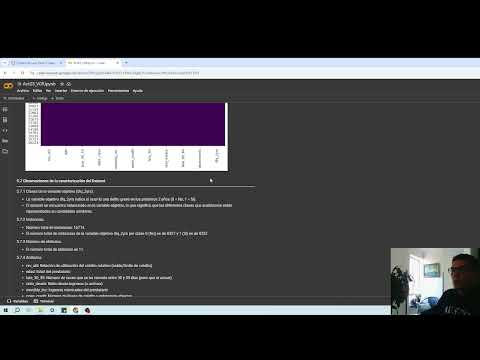

In [77]:
from IPython.display import YouTubeVideo
YouTubeVideo('SxzojxQdCaU', width=600, height=400)

[Ver en Youtube:](https://www.youtube.com/watch?v=SxzojxQdCaU)

* Video 2

  * Exploración de datos univariado

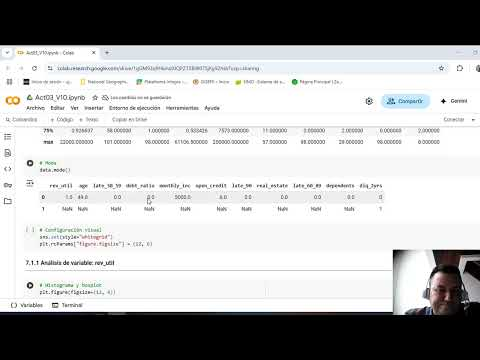

In [78]:
from IPython.display import YouTubeVideo
YouTubeVideo('GfTwSHsK6TE', width=600, height=400)

[Ver en Youtube:](https://youtu.be/GfTwSHsK6TE)

* Video 3

  * Exploración de datos multivariado

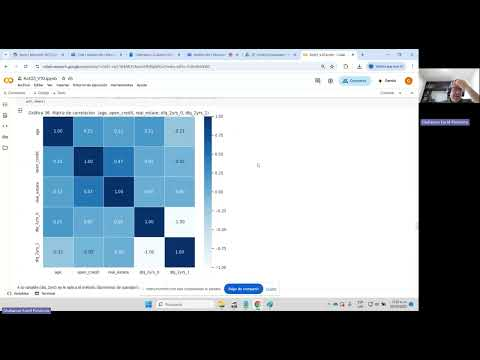

In [79]:
from IPython.display import YouTubeVideo
YouTubeVideo('IDyrhvBNqdA', width=600, height=400)

[Ver en Youtube:](https://youtu.be/IDyrhvBNqdA)